In [2]:
import SNIDsn
import SNIDdataset as snid
import numpy as np
import SNePCA

import plotly.plotly as ply
import plotly.graph_objs as go
import plotly.tools as tls

import matplotlib.pyplot as plt
from BinSpectra import lowres_dataset
import warnings
warnings.filterwarnings('ignore')

import pandas

# 1 Classification at Full resolution

## 1.1 Load preprocessed SNID datasets 

datasetX contains the SNID spectra for the phase range X +/- 5 days, where each SNe has only 1 spectrum in this phase range.  The spectrum with phase closest to X is chosen. All of the preprocessing has been applied (wavelength cut, smoothing, phase type, etc)

In [2]:
dataset0 = snid.loadPickle('../Data/DataProducts/dataset0.pickle')
dataset5 = snid.loadPickle('../Data/DataProducts/dataset5.pickle')
dataset10 = snid.loadPickle('../Data/DataProducts/dataset10.pickle')
dataset15 = snid.loadPickle('../Data/DataProducts/dataset15.pickle')

## 1.2 Run PCA

In [3]:
snidPCA0 = SNePCA.SNePCA(dataset0, -5, 5)
snidPCA5 = SNePCA.SNePCA(dataset5, 0, 10)
snidPCA10 = SNePCA.SNePCA(dataset10, 5, 15)
snidPCA15 = SNePCA.SNePCA(dataset15, 10, 20)

snidPCA0.snidPCA()
snidPCA5.snidPCA()
snidPCA10.snidPCA()
snidPCA15.snidPCA()

snidPCA0.calcPCACoeffs()
snidPCA5.calcPCACoeffs()
snidPCA10.calcPCACoeffs()
snidPCA15.calcPCACoeffs()

In [9]:
print(snidPCA0.pcaCoeffMatrix.shape)
print(snidPCA5.pcaCoeffMatrix.shape)
print(snidPCA10.pcaCoeffMatrix.shape)
print(snidPCA15.pcaCoeffMatrix.shape)

(55, 55)
(52, 52)
(56, 56)
(54, 54)


## 1.3 Eigenspectra

Each panel of the following plot shows one of the first 5 eigenspectra in every phase range.  The eigenspectra signs are consistent across phases.

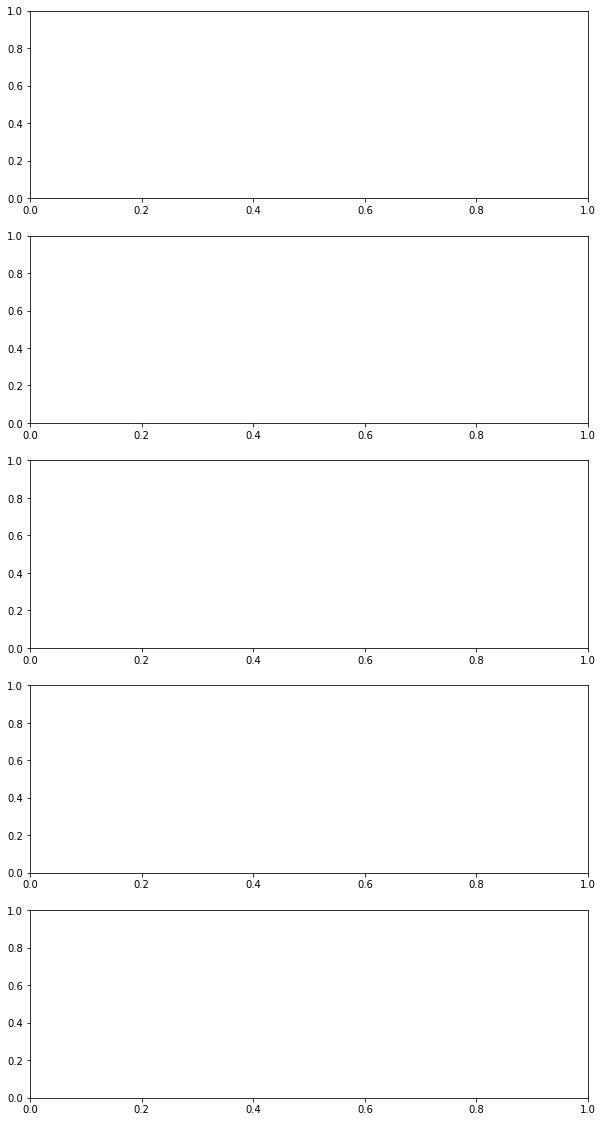

In [4]:
f, axs = plt.subplots(5,1,figsize=(10,20))

In [5]:
for i in range(5):
    ax = axs[i]
    ax.set_title('PCA%d Eigenspectra'%(i+1))
    ax.set_xlim((3800,7700))
    ax.set_yticks([])
    ax.plot(snidPCA0.wavelengths,snidPCA0.evecs[i]+2-0,'r',label='phase 0')
    ax.plot(snidPCA5.wavelengths,snidPCA5.evecs[i]+2-.5,'b',label='phase 5')
    ax.plot(snidPCA10.wavelengths,snidPCA10.evecs[i]+2-1,'c',label='phase 10')
    ax.plot(snidPCA15.wavelengths,snidPCA15.evecs[i]+2-1.5,'g',label='phase 15')
    
    #ax.plot(snidPCA20.wavelengths,snidPCA20.evecs[i]+2-2,'k',label='phase 20')
    #ax.plot(snidPCA25.wavelengths,snidPCA25.evecs[i]+2-2.5,'y',label='phase 25')
    
    ax.legend()

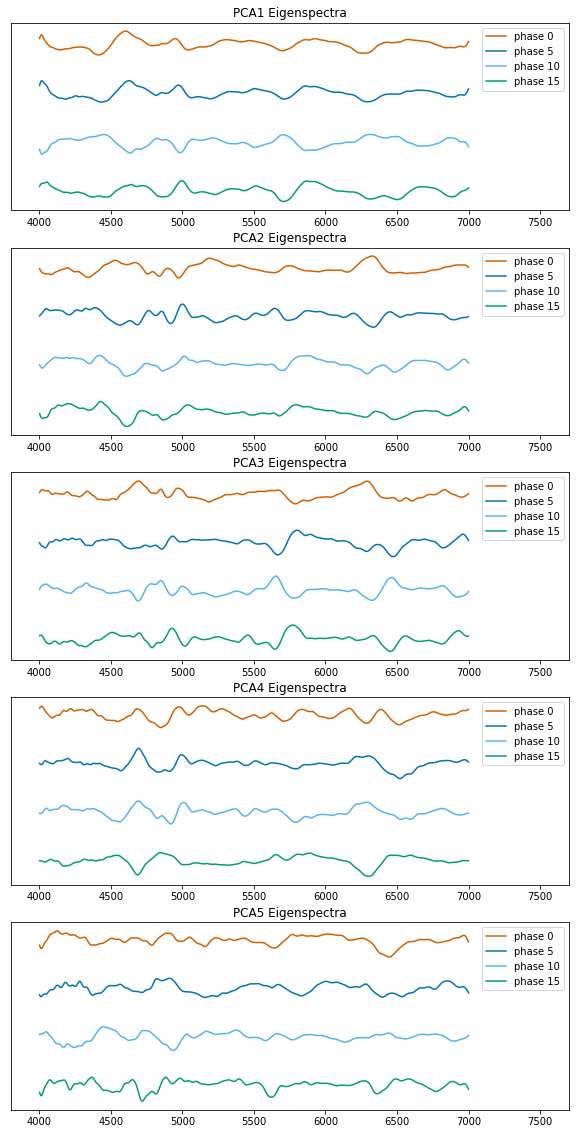

In [6]:
f

## 1.4 Classification

The following cells construct a 4 panel plot, where each panel corresponds to a 2D projection of PCA space in a different phase range.

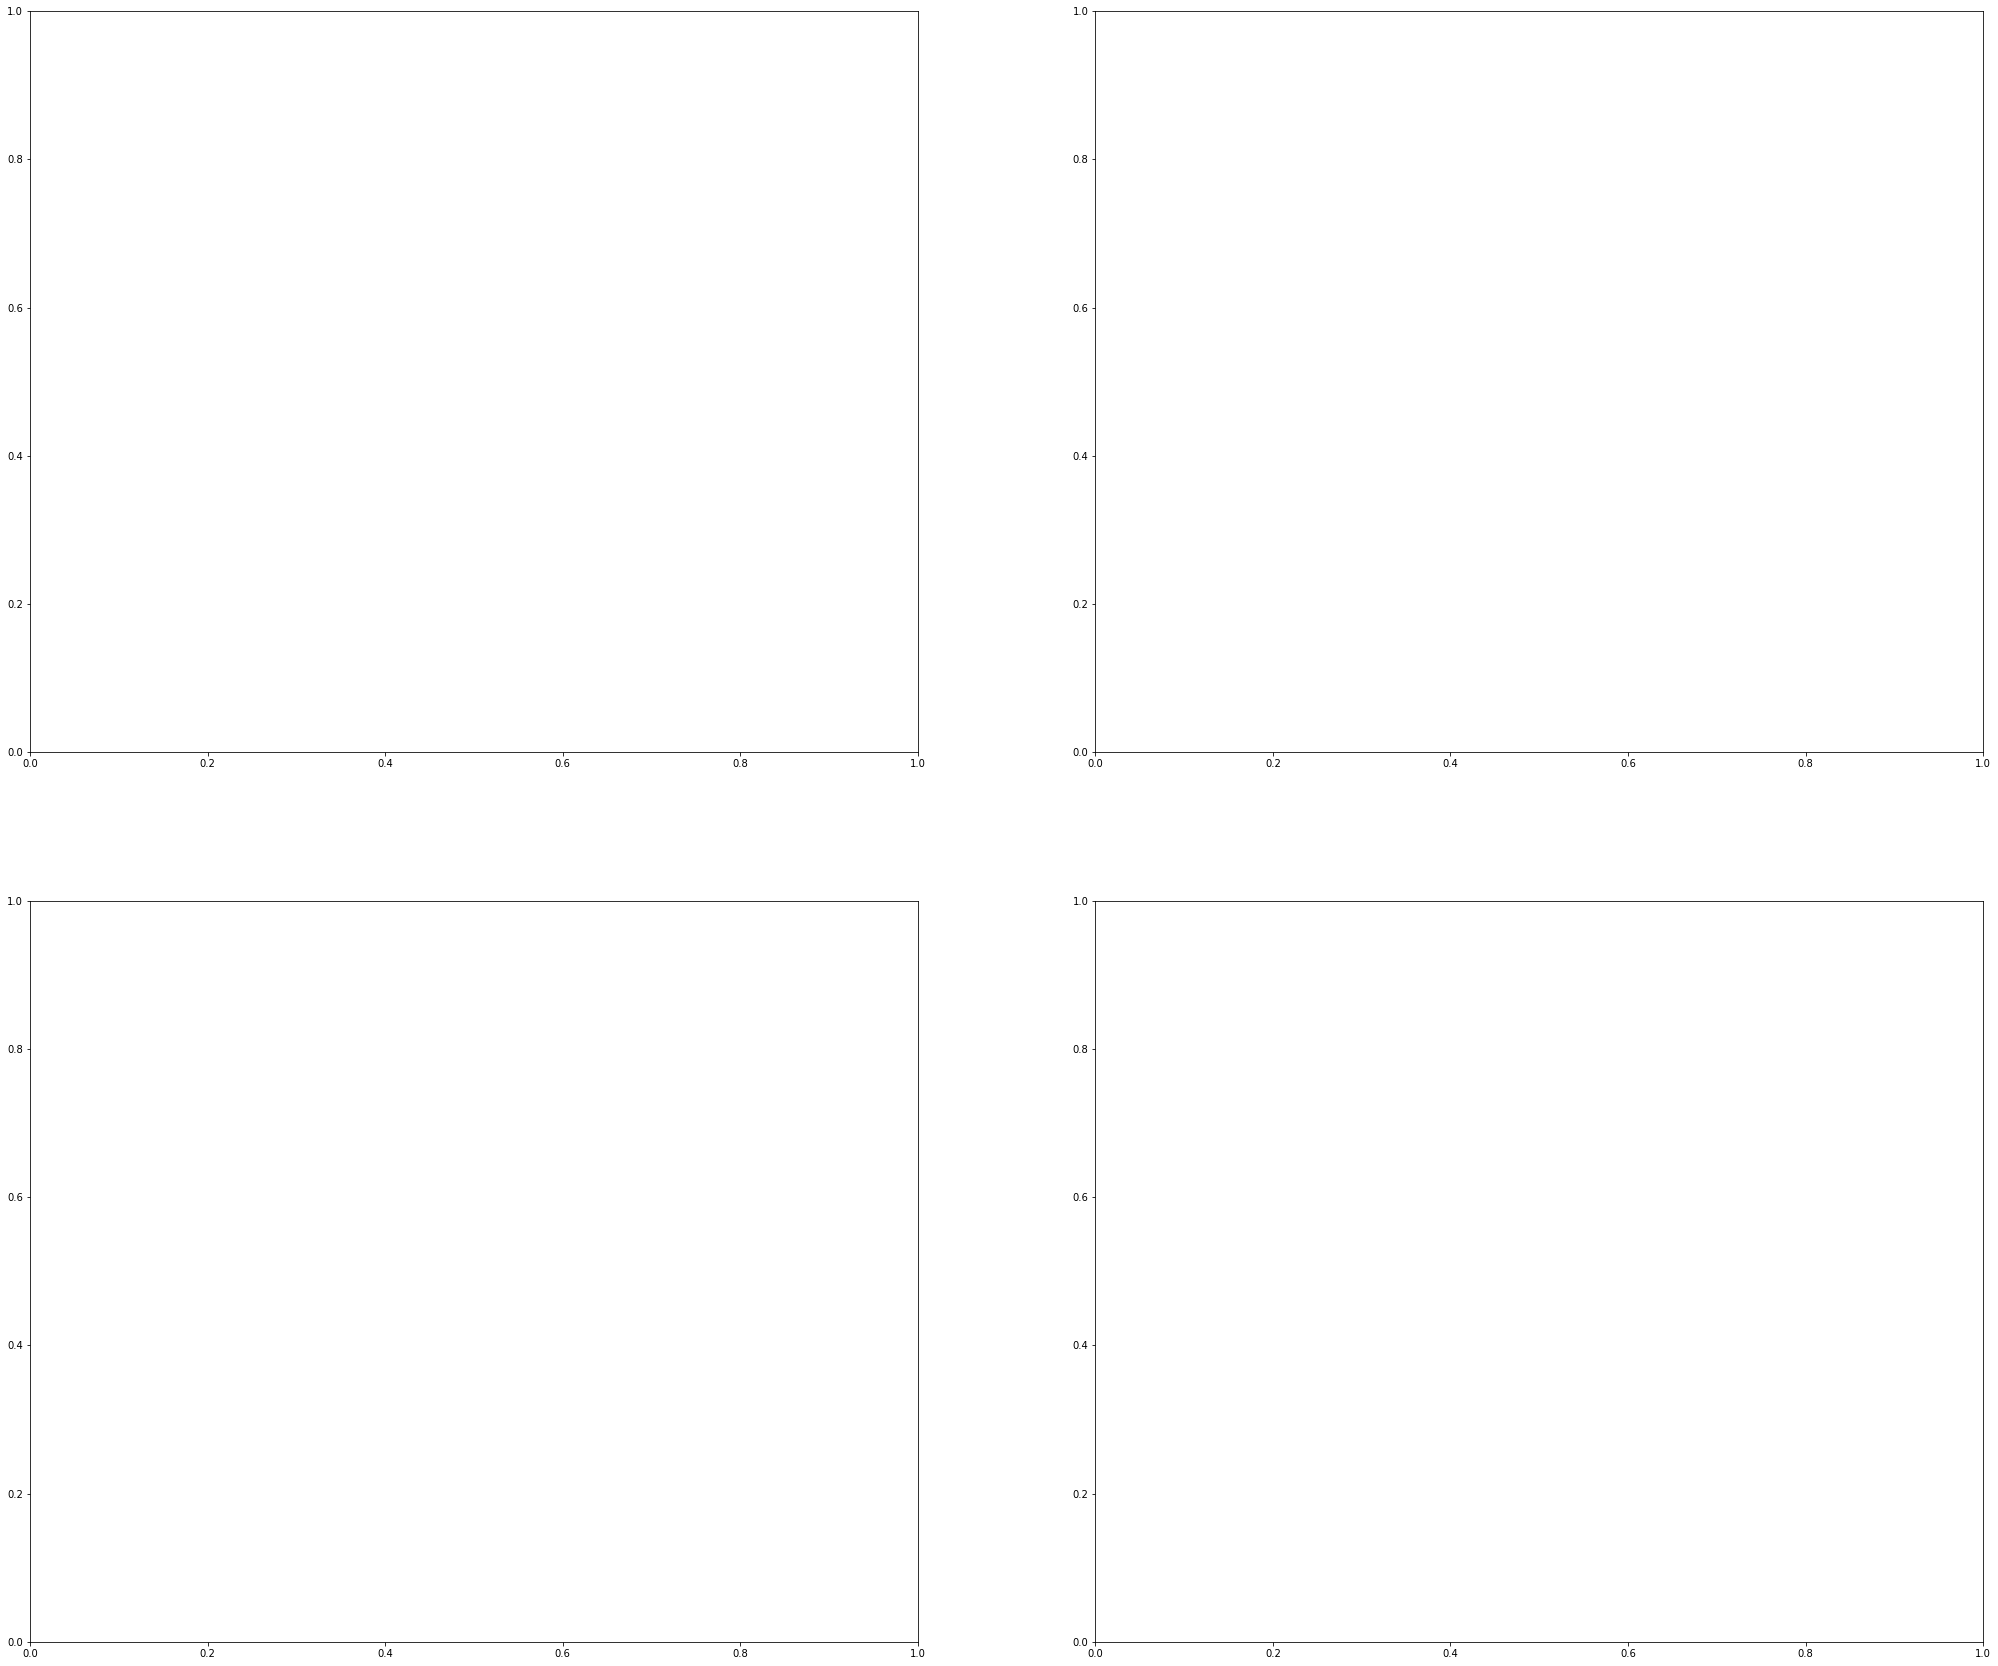

In [7]:
f_all, axs = plt.subplots(2,2,figsize=(35,30),gridspec_kw={'wspace':.2,'hspace':.2})

In [8]:
#Exclude Ib-pec and Ic-pec SNe
exclude = ['sn2007uy', 'sn2009er', 'sn2005ek']

In [9]:
svmsc=[]
f_all,svmsc,av0,std0,av0_train,std0_train=snidPCA0.pcaPlot(1,5,(10,7),alphamean=.5,alphaell=.1,alphasvm=10,purity=True,
                                     excludeSNe=exclude, std_rad=1.0, svm=True, count=3, fig=f_all,
                                     ax=f_all.axes[0],ncv=50, markOutliers=True)
print(av0, std0)

0.5588235294117647 0.13882851436712879


In [10]:
svmsc=[]
f_all,svmsc, av5, std5, av5_train,std5_train=snidPCA5.pcaPlot(1,3,(10,7),alphamean=.5,alphaell=.1,alphasvm=10,purity=True, 
                                       excludeSNe=exclude,std_rad=1.0, svm=True, count=3, 
                                       fig=f_all, ax=f_all.axes[1], ncv=50, markOutliers=True)
print(av5, std5)

0.58625 0.09428182486566539


In [11]:
svmsc=[]
f_all,svmsc, av10, std10 ,av10_train,std10_train=snidPCA10.pcaPlot(1,3,(10,7),alphamean=.5,alphaell=.1,alphasvm=10,
                                          purity=True,excludeSNe=exclude, std_rad=1.0, svm=True,
                                          count=3, fig=f_all, ax=f_all.axes[2],ncv=50, markOutliers=True)
print(av10, std10)

0.6929411764705882 0.10342909578388124


In [12]:
svmsc=[]
f_all,svmsc, av15, std15,av15_train,std15_train=snidPCA15.pcaPlot(1,3,(10,7),alphamean=.5,alphaell=.1,alphasvm=10,
                                          purity=True, excludeSNe=exclude,std_rad=1.0,
                                          svm=True, count=3, fig=f_all, ax=f_all.axes[3],ncv=50, markOutliers=True)
print(av15, std15)

0.7105882352941176 0.10177660590062196


In [13]:
for i,ax in enumerate(f_all.axes):
    l = ax.get_legend()
    t = l.get_title()
    t.set_fontsize(30)
    ax.tick_params(axis='both',which='major', length=20,direction='inout',labelsize=35)
    ax.tick_params(axis='both',which='minor', length=10,direction='inout')
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    if i==0:
        l = ax.get_legend()
        t = l.get_title()
        l.set_title('')
        ymax = ymax + 0.5
        ax.set_ylim((ymin,ymax+0.5))
        ax.text(xmin + .1,ymax - .3,'$t_{V_{max}} = 0 \pm 5$ days\nSVM Test Score = %.2f$\pm$%.2f'%(av0,std0),fontsize=45)
        ax.set_ylabel('PC5', fontsize=50)
        ax.set_xlabel('PC1', fontsize=50)
    elif i==1:
        ymax = ymax + 0.5
        ax.set_ylim((ymin,ymax+0.5))
        ax.text(xmin + .1,ymax - .2,'$t_{V_{max}} = 5 \pm 5$ days\nSVM Test Score = %.2f$\pm$%.2f'%(av5,std5),fontsize=45)
        ax.set_ylabel('PC3', fontsize=50)
        ax.set_xlabel('PC1', fontsize=50)
        ax.get_legend().remove()
    elif i==2:
        ymax = ymax + 0.5
        ax.set_ylim((ymin,ymax+0.5))
        ax.text(xmin + .1,ymax - .4,'$t_{V_{max}} = 10 \pm 5$ days\nSVM Test Score = %.2f$\pm$%.2f'%(av10,std10),fontsize=45)
        ax.set_ylabel('PC3', fontsize=50)
        ax.set_xlabel('PC1', fontsize=50)
        ax.get_legend().remove()
    else:
        ymax = ymax + 0.5
        ax.set_ylim((ymin,ymax+0.5))
        ax.text(xmin + .1,ymax - .4,'$t_{V_{max}} = 15 \pm 5$ days\nSVM Test Score = %.2f$\pm$%.2f'%(av15,std15),fontsize=45)
        ax.set_ylabel('PC3', fontsize=50)
        ax.set_xlabel('PC1', fontsize=50)
        ax.get_legend().remove()

In [14]:
#IIb 2std outliers:  ['sn2016gkg' 'sn2011dh']
#Ib 2std outliers:  ['sn2004gq' 'sn2007uy' 'sn1998dt' 'sn2009er' 'sn2007kj']
#Ic 2std outliers:  ['sn2005az']
#IcBL 2std outliers:  ['sn2010bh']
ax = f_all.axes[0]

ax.text(-.22,1.25,'07uy',fontdict={'color':'k','fontsize':35})
ax.text(.352,.302,'09er',fontdict={'color':'k','fontsize':35})
ax.text(.6,-.82,'04gq',fontdict={'color':'k','fontsize':35})
ax.text(1.45,-0.85,'98dt',fontdict={'color':'k','fontsize':35})
ax.text(3.3,.69,'07kj',fontdict={'color':'k','fontsize':35})

ax.text(1.413,-2.14,'16gkg',fontdict={'color':'k','fontsize':35})
ax.text(4.15,1.08,'11dh',fontdict={'color':'k','fontsize':35})

ax.text(0.25,-0.25,'10bh',fontdict={'color':'k','fontsize':35})

ax.text(2.9,1.48,'05az',fontdict={'color':'k','fontsize':35})



#IIb 2std outliers:  ['sn2011ei' '10as']
#Ib 2std outliers:  ['sn1998dt' 'sn2009er' 'sn2007Y']
#Ic 2std outliers:  ['sn1990B']
#IcBL 2std outliers:  ['sn2002ap' '16coi']
ax = f_all.axes[1]

ax.text(2.11,-2.5,'11ei',fontdict={'color':'k','fontsize':35})
ax.text(5.1,1.8,'10as',fontdict={'color':'k','fontsize':35})

ax.text(0.08,-.31,'09er',fontdict={'color':'k','fontsize':35})
ax.text(4.56,.76,'07Y',fontdict={'color':'k','fontsize':35})
ax.text(1.58,-1.72,'98dt',fontdict={'color':'k','fontsize':35})

ax.text(2.7,-0.8,'90B',fontdict={'color':'k','fontsize':35})

ax.text(.75,.0,'02ap',fontdict={'color':'k','fontsize':35})
ax.text(.08,-.6,'16coi',fontdict={'color':'k','fontsize':35})

ax.text(-0.16,-1.12,'16gkg',fontdict={'color':'k','fontsize':35})

ax.text(-0.28,.55,'07bg',fontdict={'color':'k','fontsize':35})

ax.text(3.79,.66,'07kj',fontdict={'color':'k','fontsize':35})







#IIb 2std outliers:  ['sn2011ei']
#Ib 2std outliers:  ['sn2007uy' 'sn1990U' 'sn1990I']
#Ic 2std outliers:  ['sn1994I']
#IcBL 2std outliers:  ['sn2002ap' 'sn2007bg']
ax = f_all.axes[2]

ax.text(1.15,-.97,'07uy',fontdict={'color':'k','fontsize':35})
ax.text(1.39,-1.40,'90I',fontdict={'color':'k','fontsize':35})
ax.text(4.69,.28, '90U',fontdict={'color':'k','fontsize':35})


ax.text(2.56,-2.0,'11ei',fontdict={'color':'k','fontsize':35})

ax.text(2.99,-1.40,'94I',fontdict={'color':'k','fontsize':35})

ax.text(1.03,-.33,'02ap',fontdict={'color':'k','fontsize':35})
ax.text(-1.02,-.95,'07ru',fontdict={'color':'k','fontsize':35})

ax.text(1.72,-2.40,'99ex',fontdict={'color':'k','fontsize':35})





#IIb 2std outliers:  ['sn2011ei']
#Ib 2std outliers:  ['sn2007uy' 'sn1990I' 'sn2009er' 'sn2004gq' 'sn2007Y']
#Ic 2std outliers:  ['sn1994I']
#IcBL 2std outliers:  ['sn2010ay' '16coi']
ax = f_all.axes[3]

ax.text(.66,-1.18,'09er',fontdict={'color':'k','fontsize':35})
ax.text(.95,-1.79,'07uy',fontdict={'color':'k','fontsize':35})
ax.text(.85,-2.38,'90I',fontdict={'color':'k','fontsize':35})
ax.text(5.06,0.58,'07Y',fontdict={'color':'k','fontsize':35})
ax.text(2.08,-3.43,'04gq',fontdict={'color':'k','fontsize':35})

ax.text(3.72,-2.09,'11ei',fontdict={'color':'k','fontsize':35})

ax.text(2.34,-1.85,'94I',fontdict={'color':'k','fontsize':35})

ax.text(-.9,.88,'10ay',fontdict={'color':'k','fontsize':35})
ax.text(-0.4,-1.3,'16coi',fontdict={'color':'k','fontsize':35})

#ax.text(2.0, 1.0, 'Test', color='green',fontdict={'color':'k','fontsize':35}, bbox=dict(facecolor='white', edgecolor='none', boxstyle='round',alpha=.5))

Text(-0.4, -1.3, '16coi')

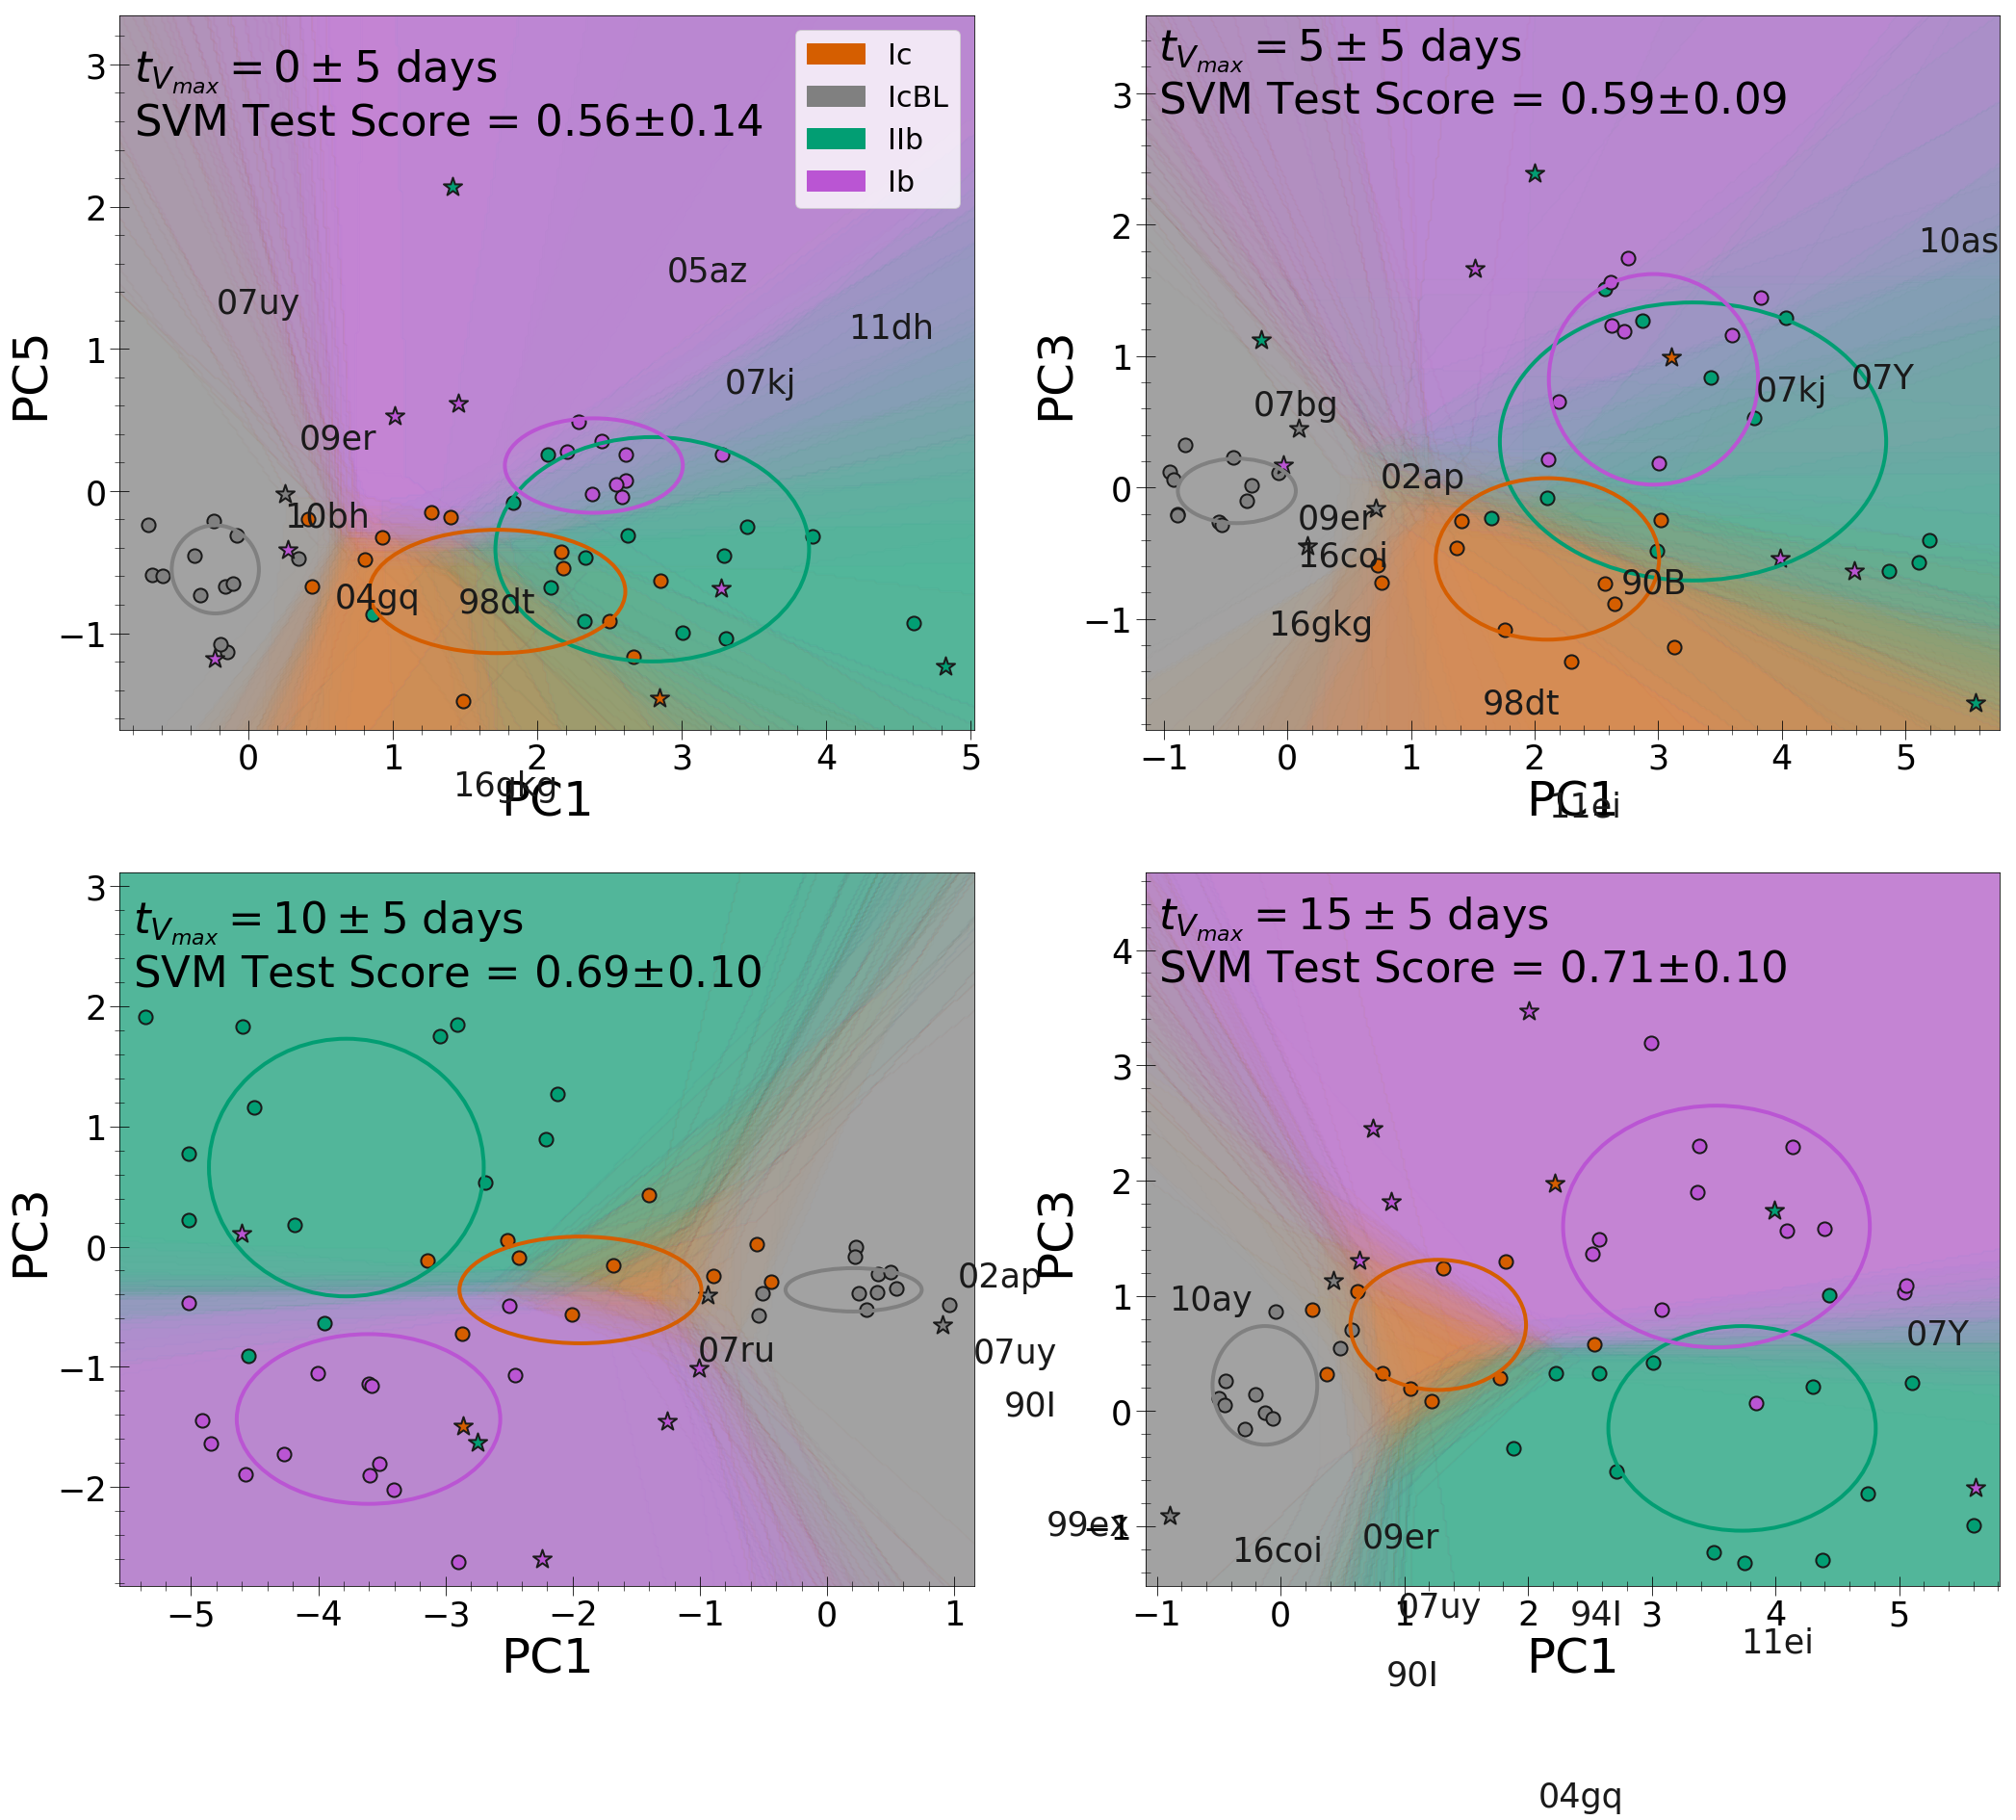

In [15]:
f_all

# 2 Classification at full resolution through rebinning function

In [3]:
dataset0 = snid.loadPickle('../Data/DataProducts/dataset0.pickle')
dataset5 = snid.loadPickle('../Data/DataProducts/dataset5.pickle')
dataset10 = snid.loadPickle('../Data/DataProducts/dataset10.pickle')
dataset15 = snid.loadPickle('../Data/DataProducts/dataset15.pickle')

In [4]:
k = 0.0027069686088658784       # Original resolution
#k = 0.11098571296350102         # Lowest resolution

dataset_lowres0 = lowres_dataset(dataset0, k)
dataset_lowres5 = lowres_dataset(dataset5, k)
dataset_lowres10 = lowres_dataset(dataset10, k)
dataset_lowres15 = lowres_dataset(dataset15, k)


snidPCA0 = SNePCA.SNePCA(dataset_lowres0, -5, 5)
snidPCA5 = SNePCA.SNePCA(dataset_lowres5, 0, 10)
snidPCA10 = SNePCA.SNePCA(dataset_lowres10, 5, 15)
snidPCA15 = SNePCA.SNePCA(dataset_lowres15, 10, 20)

snidPCA0.snidPCA()
snidPCA5.snidPCA()
snidPCA10.snidPCA()
snidPCA15.snidPCA()

snidPCA0.calcPCACoeffs()
snidPCA5.calcPCACoeffs()
snidPCA10.calcPCACoeffs()
snidPCA15.calcPCACoeffs()

## 2.1 Eigenspectra

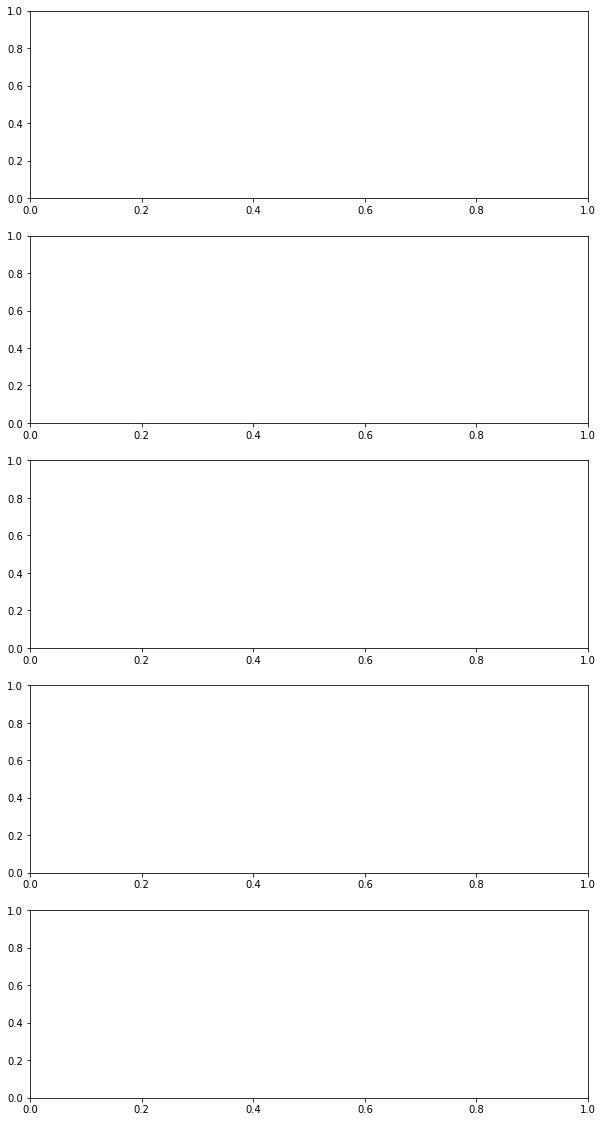

In [5]:
f, axs = plt.subplots(5,1,figsize=(10,20))

In [6]:
for i in range(5):
    ax = axs[i]
    ax.set_title('PCA%d Eigenspectra'%(i+1))
    ax.set_xlim((3800,7700))
    ax.set_yticks([])
    ax.plot(snidPCA0.wavelengths,snidPCA0.evecs[i]+2-0,'r',label='phase 0')
    ax.plot(snidPCA5.wavelengths,snidPCA5.evecs[i]+2-.5,'b',label='phase 5')
    ax.plot(snidPCA10.wavelengths,snidPCA10.evecs[i]+2-1,'c',label='phase 10')
    ax.plot(snidPCA15.wavelengths,snidPCA15.evecs[i]+2-1.5,'g',label='phase 15')
    
    #ax.plot(snidPCA20.wavelengths,snidPCA20.evecs[i]+2-2,'k',label='phase 20')
    #ax.plot(snidPCA25.wavelengths,snidPCA25.evecs[i]+2-2.5,'y',label='phase 25')
    
    ax.legend()

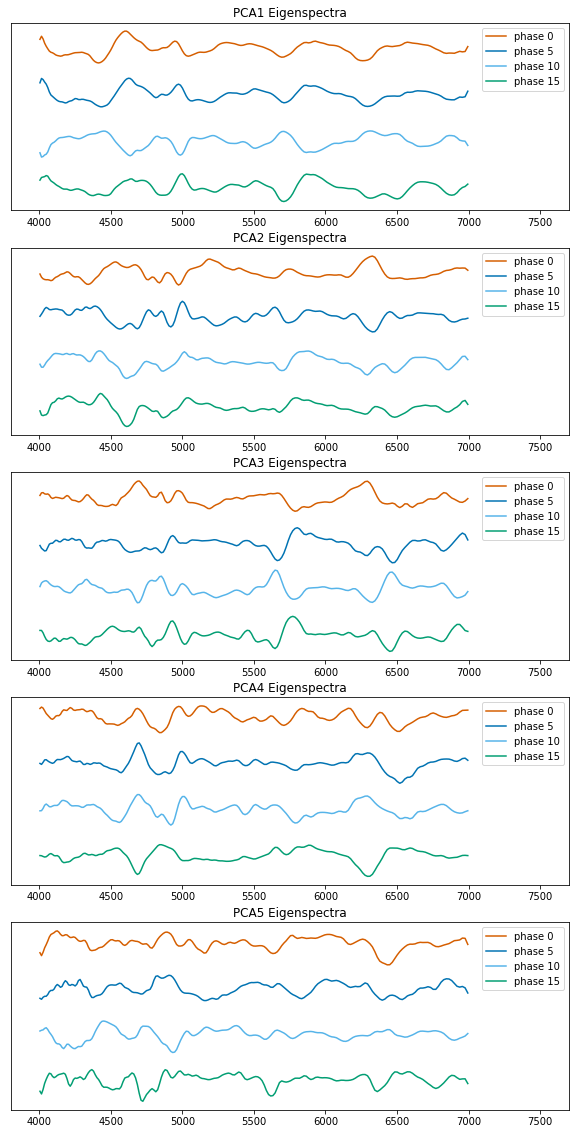

In [7]:
f

## 2.2 Classification

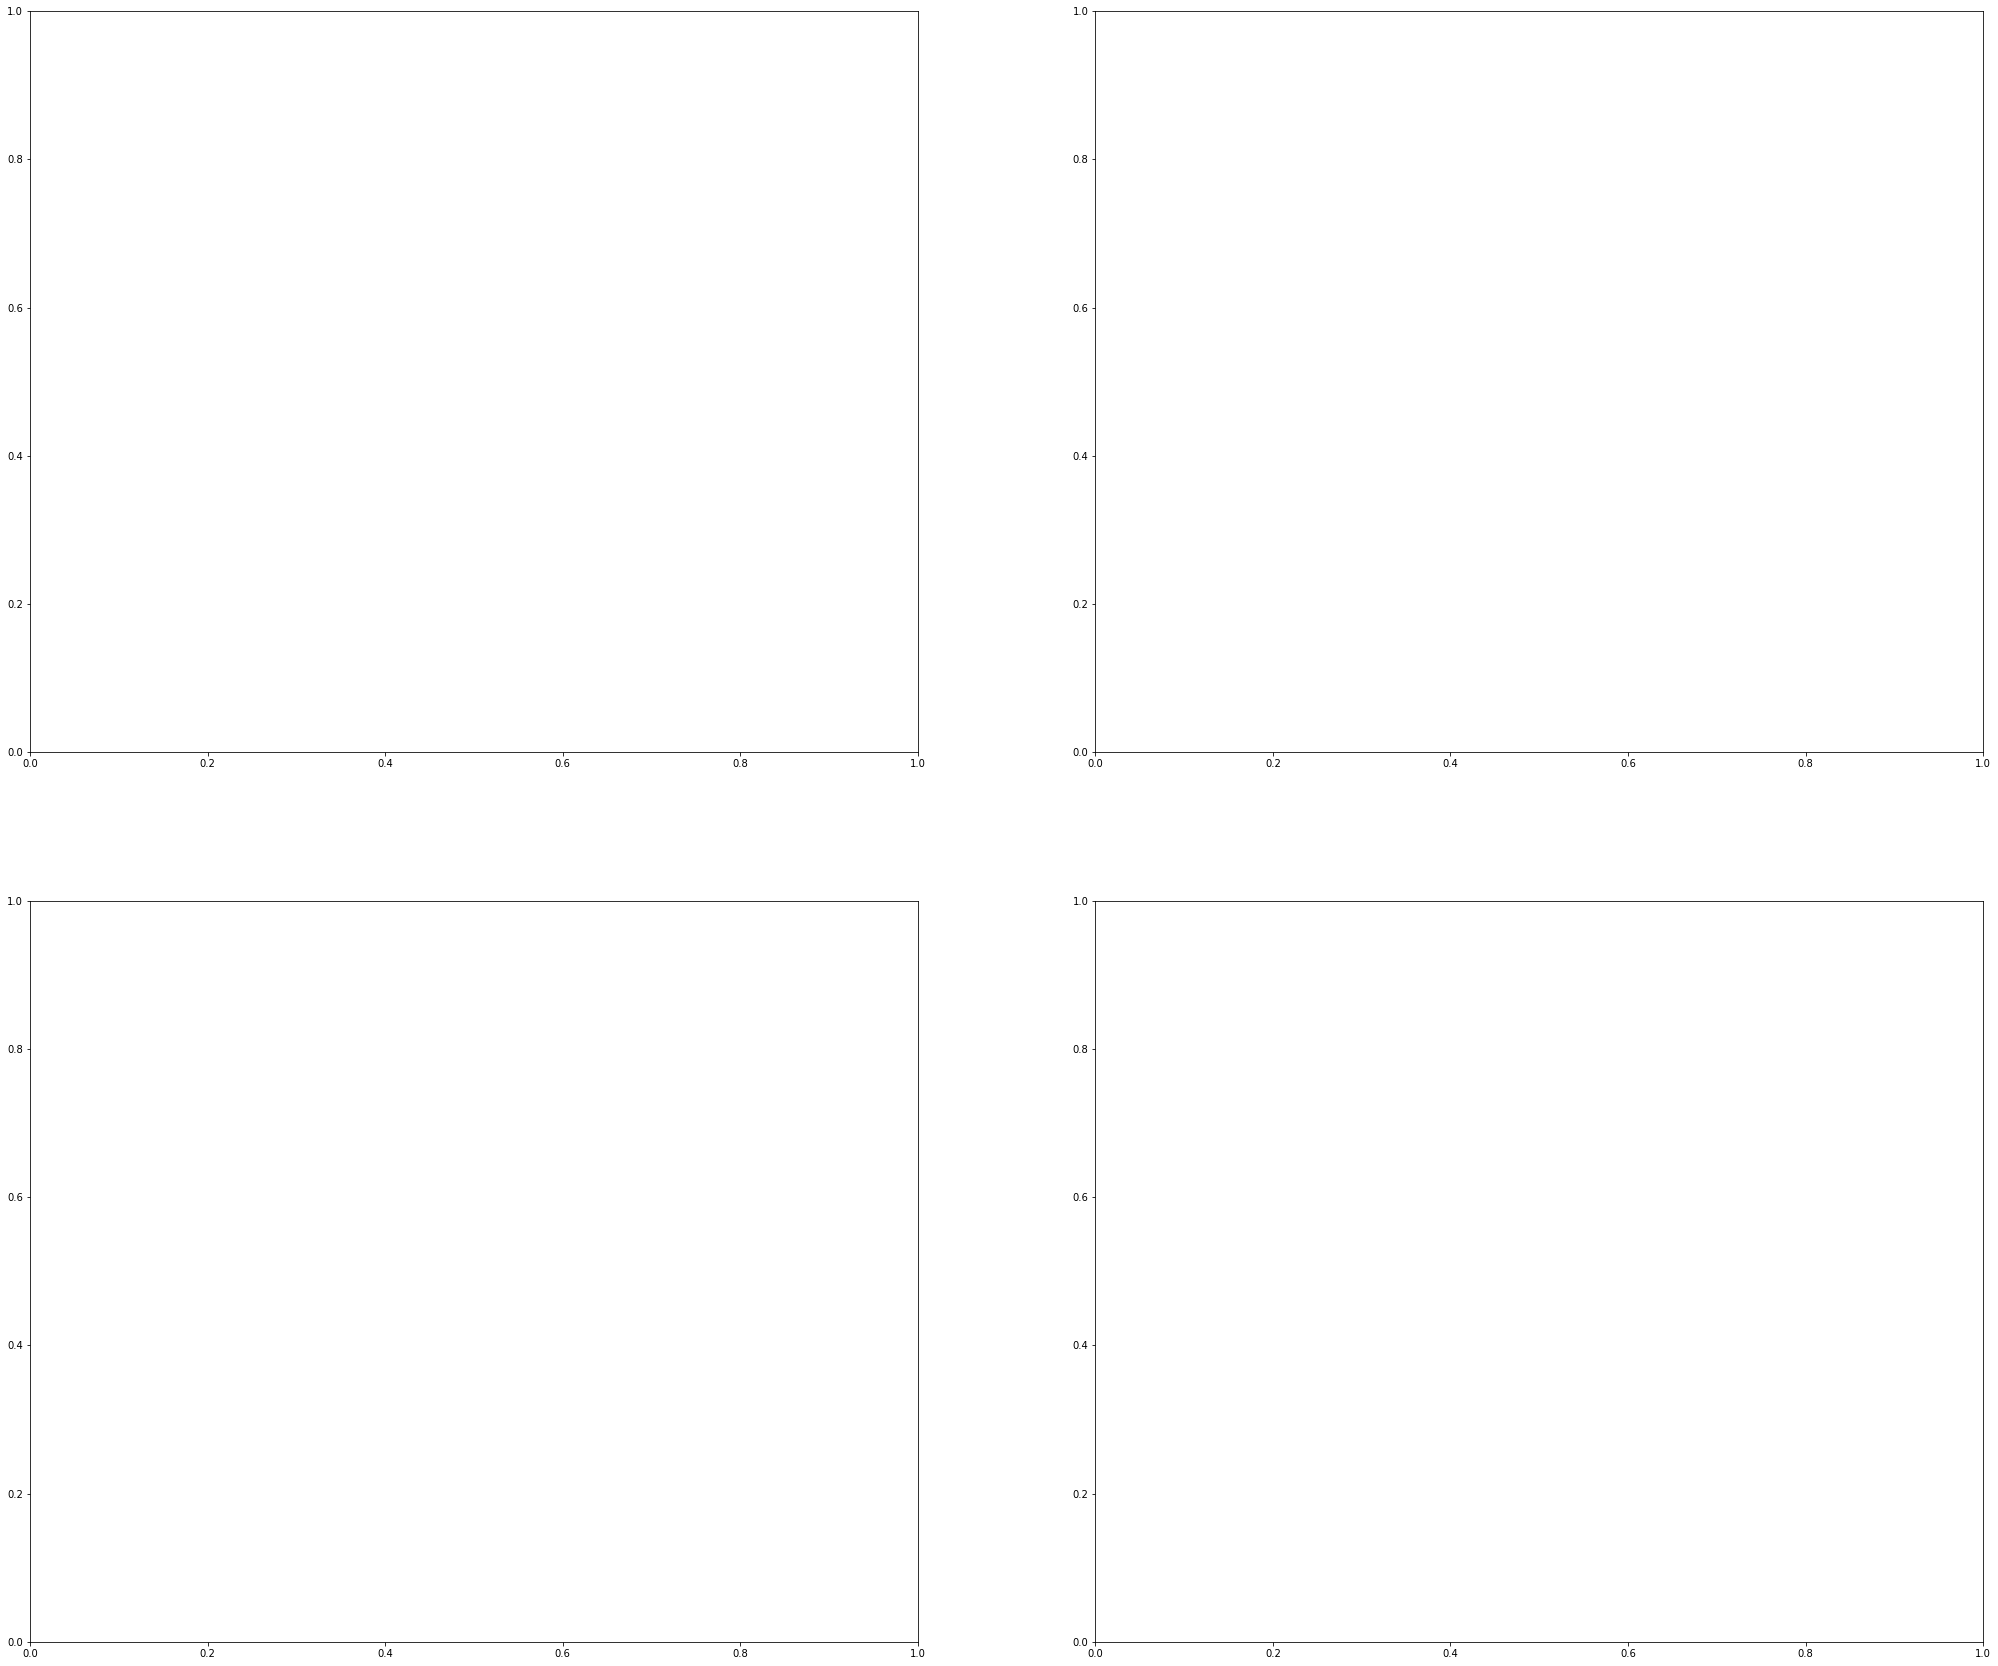

In [8]:
f_all, axs = plt.subplots(2,2,figsize=(35,30),gridspec_kw={'wspace':.2,'hspace':.2})

In [9]:
#Exclude Ib-pec and Ic-pec SNe
exclude = ['sn2007uy', 'sn2009er', 'sn2005ek']

In [10]:
svmsc=[]
f_all,svmsc,av0,std0,av0_train,std0_train=snidPCA0.pcaPlot(1,5,(10,7),alphamean=.5,alphaell=.1,alphasvm=10,purity=True,
                                     excludeSNe=exclude, std_rad=1.0, svm=True, count=3, fig=f_all,
                                     ax=f_all.axes[0],ncv=50, markOutliers=True)
print(av0, std0)

0.5329411764705883 0.13174894863765718


In [11]:
svmsc=[]
f_all,svmsc, av5, std5, av5_train,std5_train=snidPCA5.pcaPlot(1,3,(10,7),alphamean=.5,alphaell=.1,alphasvm=10,purity=True, 
                                       excludeSNe=exclude,std_rad=1.0, svm=True, count=3, 
                                       fig=f_all, ax=f_all.axes[1], ncv=50, markOutliers=True)
print(av5, std5)

0.5875 0.1352081728298996


In [12]:
svmsc=[]
f_all,svmsc, av10, std10 ,av10_train,std10_train=snidPCA10.pcaPlot(1,3,(10,7),alphamean=.5,alphaell=.1,alphasvm=10,
                                          purity=True,excludeSNe=exclude, std_rad=1.0, svm=True,
                                          count=3, fig=f_all, ax=f_all.axes[2],ncv=50, markOutliers=True)
print(av10, std10)

0.7176470588235294 0.10718157151934468


In [13]:
svmsc=[]
f_all,svmsc, av15, std15,av15_train,std15_train=snidPCA15.pcaPlot(1,3,(10,7),alphamean=.5,alphaell=.1,alphasvm=10,
                                          purity=True, excludeSNe=exclude,std_rad=1.0,
                                          svm=True, count=3, fig=f_all, ax=f_all.axes[3],ncv=50, markOutliers=True)
print(av15, std15)

0.6894117647058825 0.10392970741344834


In [14]:
for i,ax in enumerate(f_all.axes):
    l = ax.get_legend()
    t = l.get_title()
    t.set_fontsize(30)
    ax.tick_params(axis='both',which='major', length=20,direction='inout',labelsize=35)
    ax.tick_params(axis='both',which='minor', length=10,direction='inout')
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    if i==0:
        l = ax.get_legend()
        t = l.get_title()
        l.set_title('')
        ymax = ymax + 0.5
        ax.set_ylim((ymin,ymax+0.5))
        ax.text(xmin + .1,ymax - .3,'$t_{V_{max}} = 0 \pm 5$ days\nSVM Test Score = %.2f$\pm$%.2f'%(av0,std0),fontsize=45)
        ax.set_ylabel('PC5', fontsize=50)
        ax.set_xlabel('PC1', fontsize=50)
    elif i==1:
        ymax = ymax + 0.5
        ax.set_ylim((ymin,ymax+0.5))
        ax.text(xmin + .1,ymax - .2,'$t_{V_{max}} = 5 \pm 5$ days\nSVM Test Score = %.2f$\pm$%.2f'%(av5,std5),fontsize=45)
        ax.set_ylabel('PC3', fontsize=50)
        ax.set_xlabel('PC1', fontsize=50)
        ax.get_legend().remove()
    elif i==2:
        ymax = ymax + 0.5
        ax.set_ylim((ymin,ymax+0.5))
        ax.text(xmin + .1,ymax - .4,'$t_{V_{max}} = 10 \pm 5$ days\nSVM Test Score = %.2f$\pm$%.2f'%(av10,std10),fontsize=45)
        ax.set_ylabel('PC3', fontsize=50)
        ax.set_xlabel('PC1', fontsize=50)
        ax.get_legend().remove()
    else:
        ymax = ymax + 0.5
        ax.set_ylim((ymin,ymax+0.5))
        ax.text(xmin + .1,ymax - .4,'$t_{V_{max}} = 15 \pm 5$ days\nSVM Test Score = %.2f$\pm$%.2f'%(av15,std15),fontsize=45)
        ax.set_ylabel('PC3', fontsize=50)
        ax.set_xlabel('PC1', fontsize=50)
        ax.get_legend().remove()

In [15]:
#IIb 2std outliers:  ['sn2016gkg' 'sn2011dh']
#Ib 2std outliers:  ['sn2004gq' 'sn2007uy' 'sn1998dt' 'sn2009er' 'sn2007kj']
#Ic 2std outliers:  ['sn2005az']
#IcBL 2std outliers:  ['sn2010bh']
ax = f_all.axes[0]

ax.text(-.22,1.25,'07uy',fontdict={'color':'k','fontsize':35})
ax.text(.352,.302,'09er',fontdict={'color':'k','fontsize':35})
ax.text(.6,-.82,'04gq',fontdict={'color':'k','fontsize':35})
ax.text(1.45,-0.85,'98dt',fontdict={'color':'k','fontsize':35})
ax.text(3.3,.69,'07kj',fontdict={'color':'k','fontsize':35})

ax.text(1.413,-2.14,'16gkg',fontdict={'color':'k','fontsize':35})
ax.text(4.15,1.08,'11dh',fontdict={'color':'k','fontsize':35})

ax.text(0.25,-0.25,'10bh',fontdict={'color':'k','fontsize':35})

ax.text(2.9,1.48,'05az',fontdict={'color':'k','fontsize':35})



#IIb 2std outliers:  ['sn2011ei' '10as']
#Ib 2std outliers:  ['sn1998dt' 'sn2009er' 'sn2007Y']
#Ic 2std outliers:  ['sn1990B']
#IcBL 2std outliers:  ['sn2002ap' '16coi']
ax = f_all.axes[1]

ax.text(2.11,-2.5,'11ei',fontdict={'color':'k','fontsize':35})
ax.text(5.1,1.8,'10as',fontdict={'color':'k','fontsize':35})

ax.text(0.08,-.31,'09er',fontdict={'color':'k','fontsize':35})
ax.text(4.56,.76,'07Y',fontdict={'color':'k','fontsize':35})
ax.text(1.58,-1.72,'98dt',fontdict={'color':'k','fontsize':35})

ax.text(2.7,-0.8,'90B',fontdict={'color':'k','fontsize':35})

ax.text(.75,.0,'02ap',fontdict={'color':'k','fontsize':35})
ax.text(.08,-.6,'16coi',fontdict={'color':'k','fontsize':35})

ax.text(-0.16,-1.12,'16gkg',fontdict={'color':'k','fontsize':35})

ax.text(-0.28,.55,'07bg',fontdict={'color':'k','fontsize':35})

ax.text(3.79,.66,'07kj',fontdict={'color':'k','fontsize':35})







#IIb 2std outliers:  ['sn2011ei']
#Ib 2std outliers:  ['sn2007uy' 'sn1990U' 'sn1990I']
#Ic 2std outliers:  ['sn1994I']
#IcBL 2std outliers:  ['sn2002ap' 'sn2007bg']
ax = f_all.axes[2]

ax.text(1.15,-.97,'07uy',fontdict={'color':'k','fontsize':35})
ax.text(1.39,-1.40,'90I',fontdict={'color':'k','fontsize':35})
ax.text(4.69,.28, '90U',fontdict={'color':'k','fontsize':35})


ax.text(2.56,-2.0,'11ei',fontdict={'color':'k','fontsize':35})

ax.text(2.99,-1.40,'94I',fontdict={'color':'k','fontsize':35})

ax.text(1.03,-.33,'02ap',fontdict={'color':'k','fontsize':35})
ax.text(-1.02,-.95,'07ru',fontdict={'color':'k','fontsize':35})

ax.text(1.72,-2.40,'99ex',fontdict={'color':'k','fontsize':35})





#IIb 2std outliers:  ['sn2011ei']
#Ib 2std outliers:  ['sn2007uy' 'sn1990I' 'sn2009er' 'sn2004gq' 'sn2007Y']
#Ic 2std outliers:  ['sn1994I']
#IcBL 2std outliers:  ['sn2010ay' '16coi']
ax = f_all.axes[3]

ax.text(.66,-1.18,'09er',fontdict={'color':'k','fontsize':35})
ax.text(.95,-1.79,'07uy',fontdict={'color':'k','fontsize':35})
ax.text(.85,-2.38,'90I',fontdict={'color':'k','fontsize':35})
ax.text(5.06,0.58,'07Y',fontdict={'color':'k','fontsize':35})
ax.text(2.08,-3.43,'04gq',fontdict={'color':'k','fontsize':35})

ax.text(3.72,-2.09,'11ei',fontdict={'color':'k','fontsize':35})

ax.text(2.34,-1.85,'94I',fontdict={'color':'k','fontsize':35})

ax.text(-.9,.88,'10ay',fontdict={'color':'k','fontsize':35})
ax.text(-0.4,-1.3,'16coi',fontdict={'color':'k','fontsize':35})

#ax.text(2.0, 1.0, 'Test', color='green',fontdict={'color':'k','fontsize':35}, bbox=dict(facecolor='white', edgecolor='none', boxstyle='round',alpha=.5))

Text(-0.4, -1.3, '16coi')

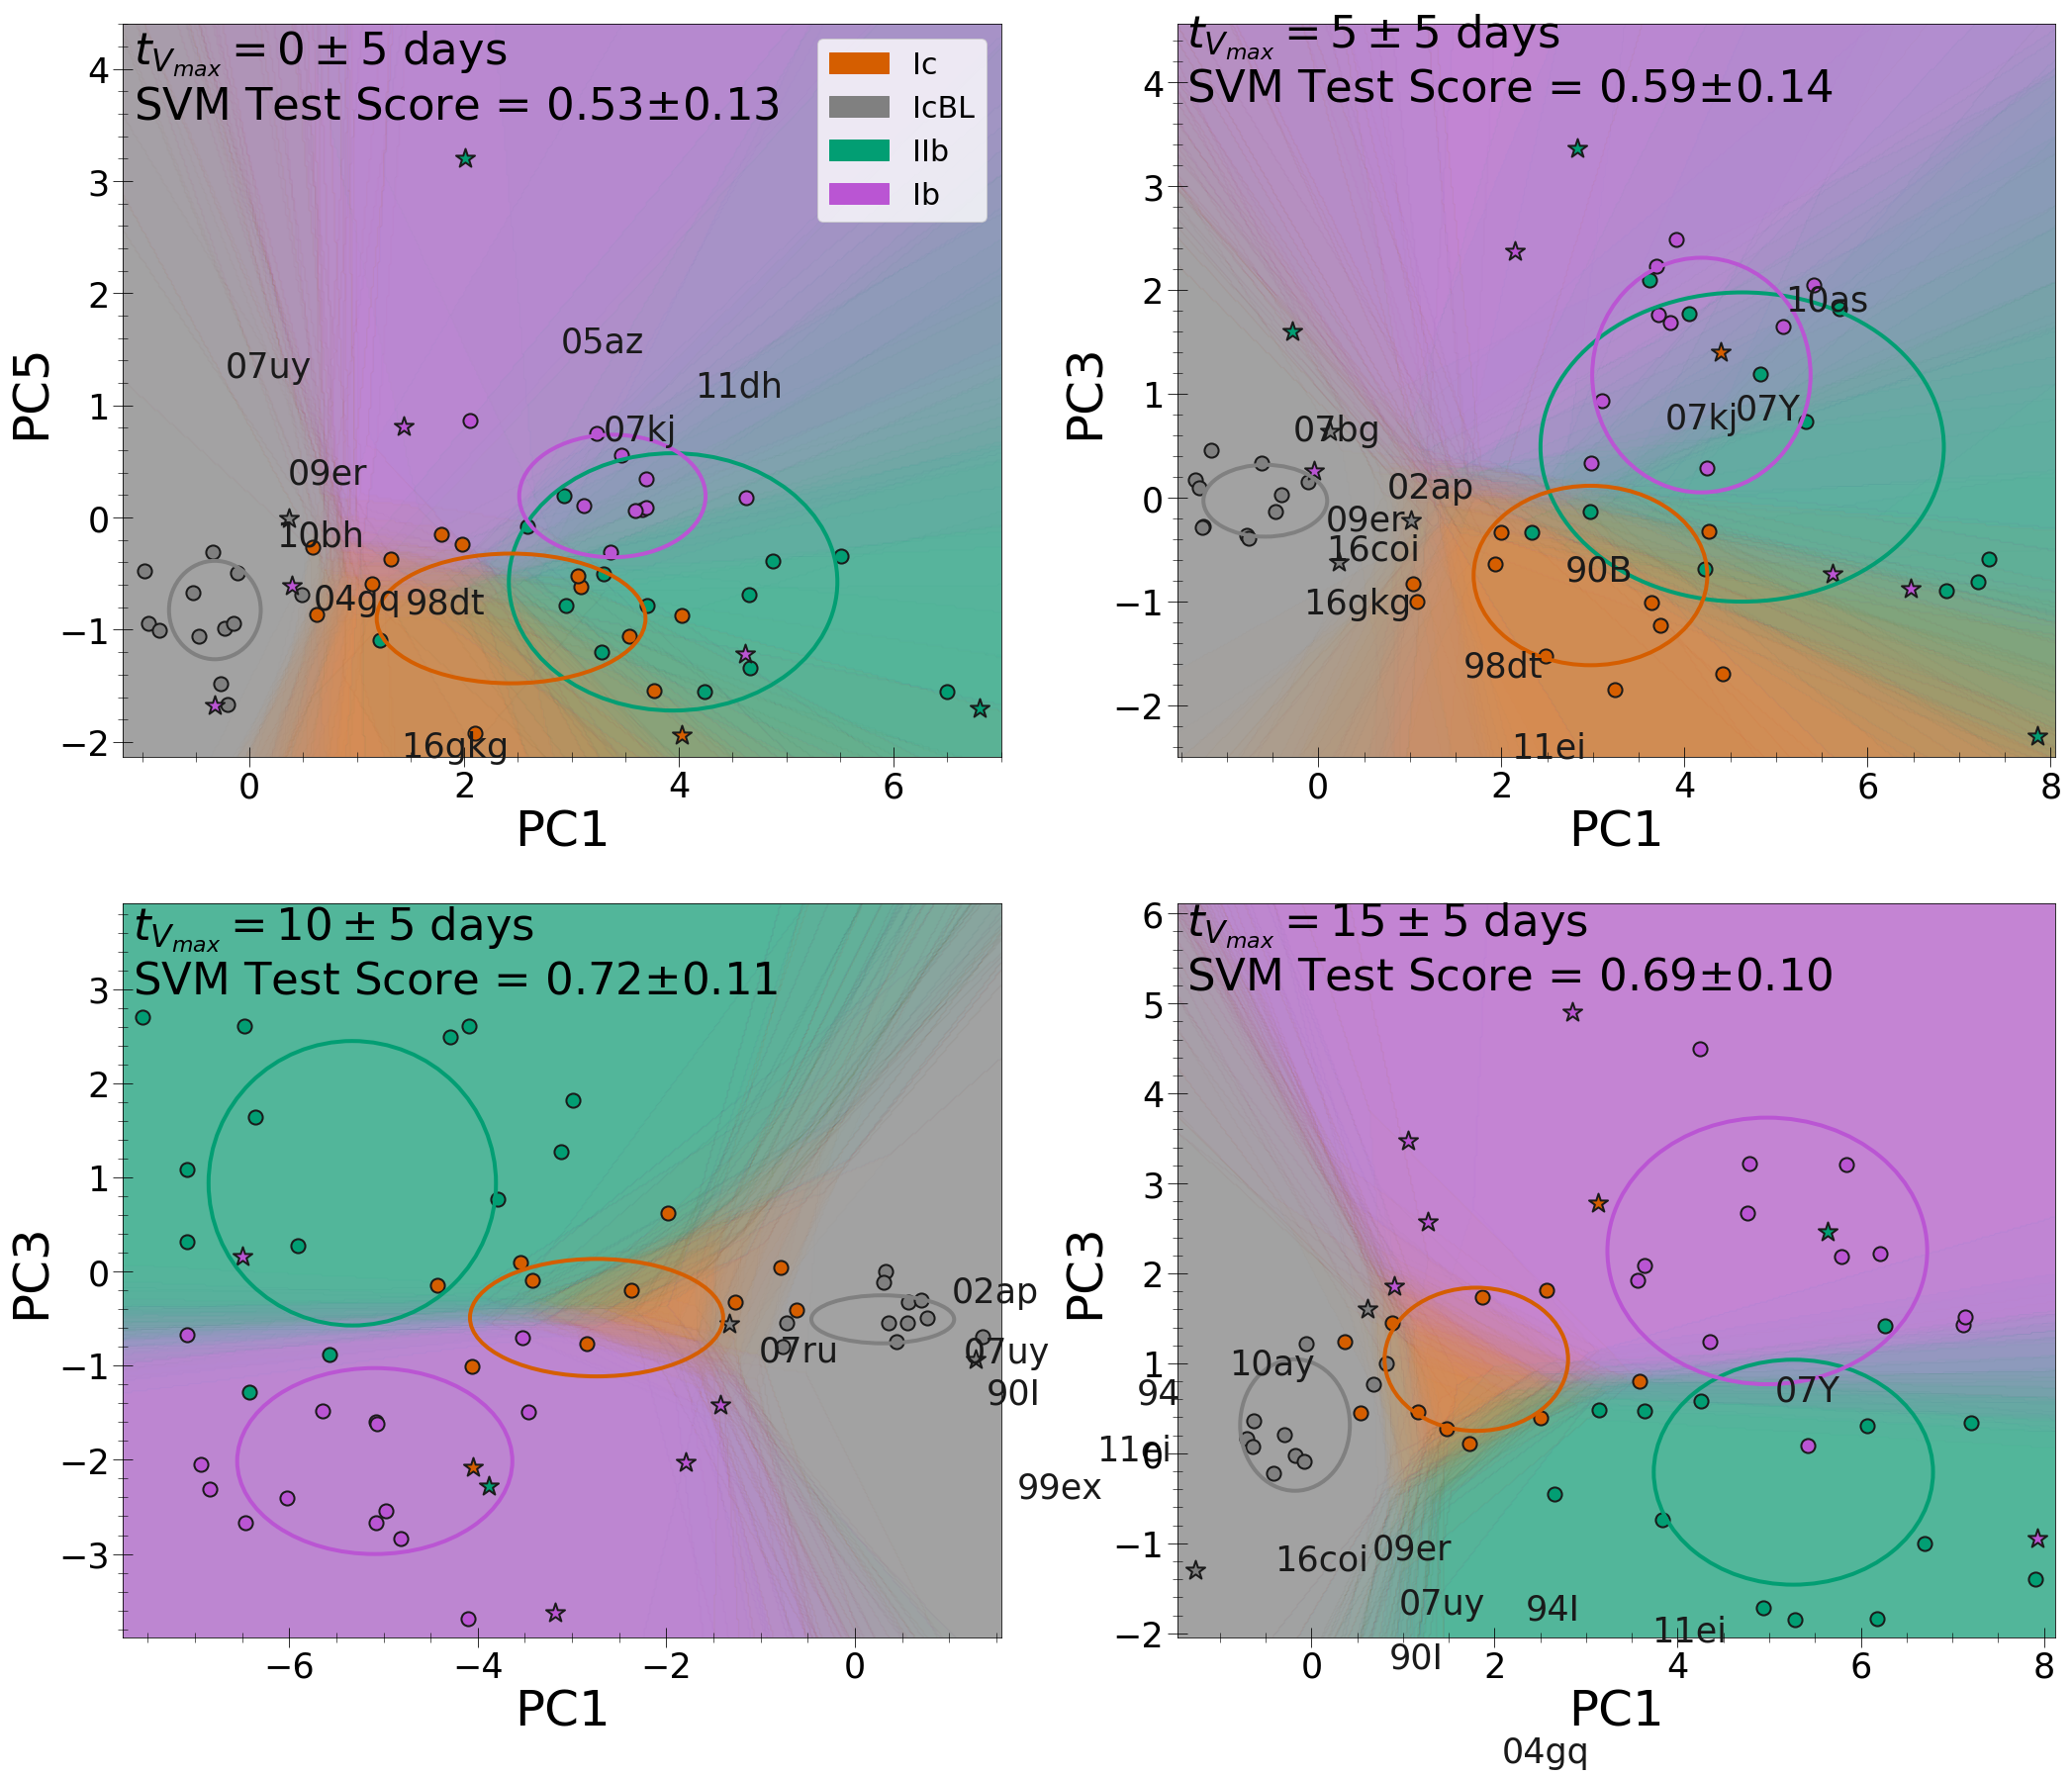

In [16]:
f_all

# 3 Classification at lowest resolution through rebinning function

In [17]:
dataset0 = snid.loadPickle('../Data/DataProducts/dataset0.pickle')
dataset5 = snid.loadPickle('../Data/DataProducts/dataset5.pickle')
dataset10 = snid.loadPickle('../Data/DataProducts/dataset10.pickle')
dataset15 = snid.loadPickle('../Data/DataProducts/dataset15.pickle')

In [18]:
#k = 0.0027069686088658784       # Original resolution
k = 0.11098571296350102         # Lowest resolution

dataset_lowres0 = lowres_dataset(dataset0, k)
dataset_lowres5 = lowres_dataset(dataset5, k)
dataset_lowres10 = lowres_dataset(dataset10, k)
dataset_lowres15 = lowres_dataset(dataset15, k)


snidPCA0 = SNePCA.SNePCA(dataset_lowres0, -5, 5)
snidPCA5 = SNePCA.SNePCA(dataset_lowres5, 0, 10)
snidPCA10 = SNePCA.SNePCA(dataset_lowres10, 5, 15)
snidPCA15 = SNePCA.SNePCA(dataset_lowres15, 10, 20)

snidPCA0.snidPCA()
snidPCA5.snidPCA()
snidPCA10.snidPCA()
snidPCA15.snidPCA()

snidPCA0.calcPCACoeffs()
snidPCA5.calcPCACoeffs()
snidPCA10.calcPCACoeffs()
snidPCA15.calcPCACoeffs()

## 3.1 Eigenspectra

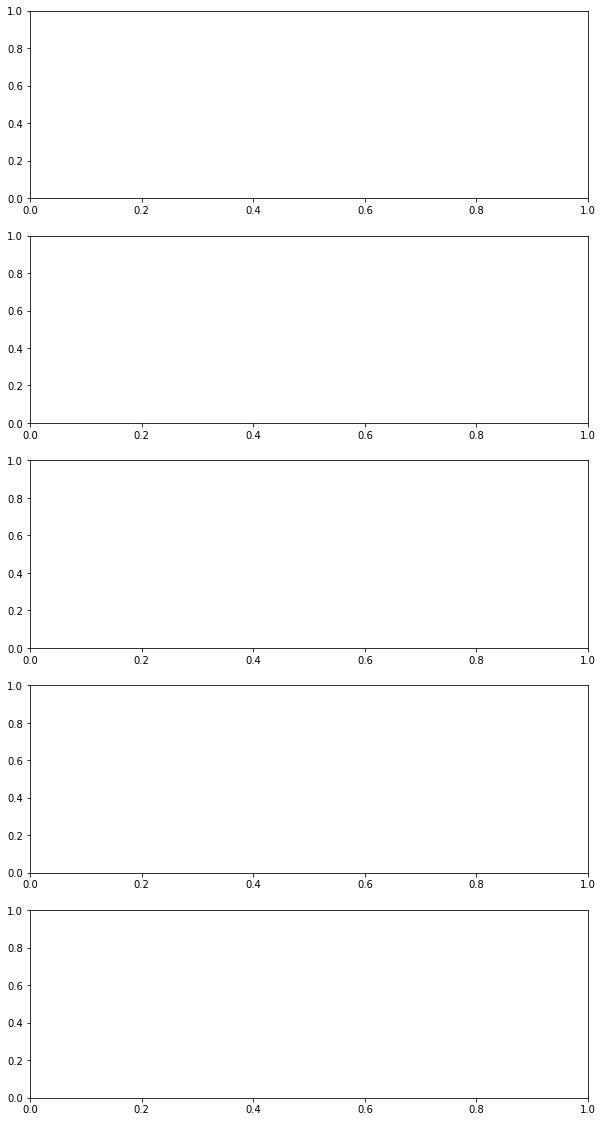

In [19]:
f, axs = plt.subplots(5,1,figsize=(10,20))

In [20]:
for i in range(5):
    ax = axs[i]
    ax.set_title('PCA%d Eigenspectra'%(i+1))
    ax.set_xlim((4200,6700))
    ax.set_yticks([])
    ax.plot(snidPCA0.wavelengths,snidPCA0.evecs[i]+2-0,'r',label='phase 0')
    ax.plot(snidPCA5.wavelengths,snidPCA5.evecs[i]+2-.5,'b',label='phase 5')
    ax.plot(snidPCA10.wavelengths,snidPCA10.evecs[i]+2-1,'c',label='phase 10')
    ax.plot(snidPCA15.wavelengths,snidPCA15.evecs[i]+2-1.5,'g',label='phase 15')
    
    #ax.plot(snidPCA20.wavelengths,snidPCA20.evecs[i]+2-2,'k',label='phase 20')
    #ax.plot(snidPCA25.wavelengths,snidPCA25.evecs[i]+2-2.5,'y',label='phase 25')
    
    ax.legend()

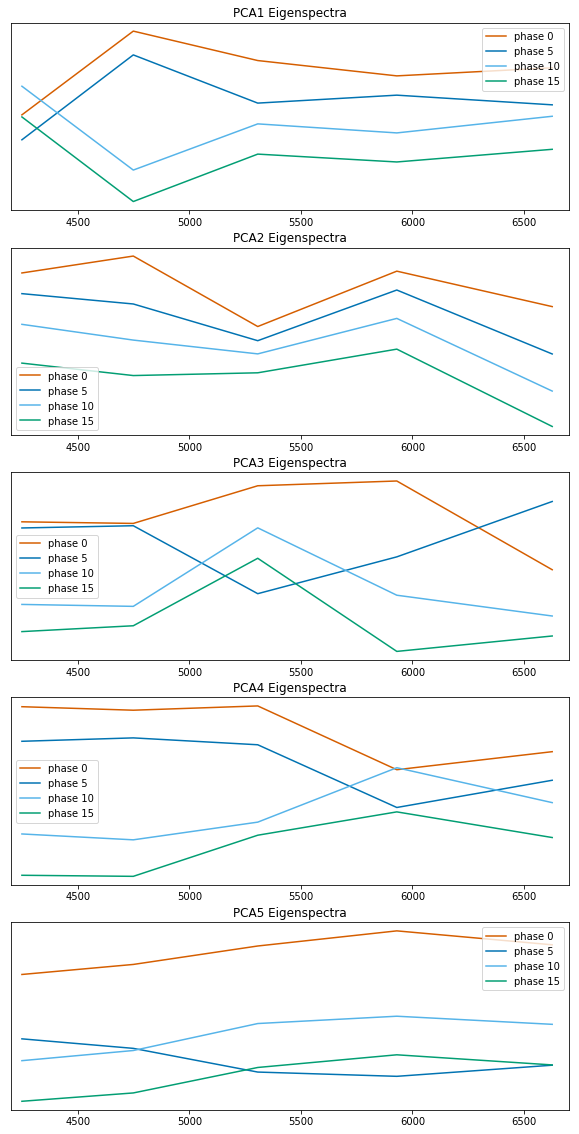

In [21]:
f

## 3.2 Classification

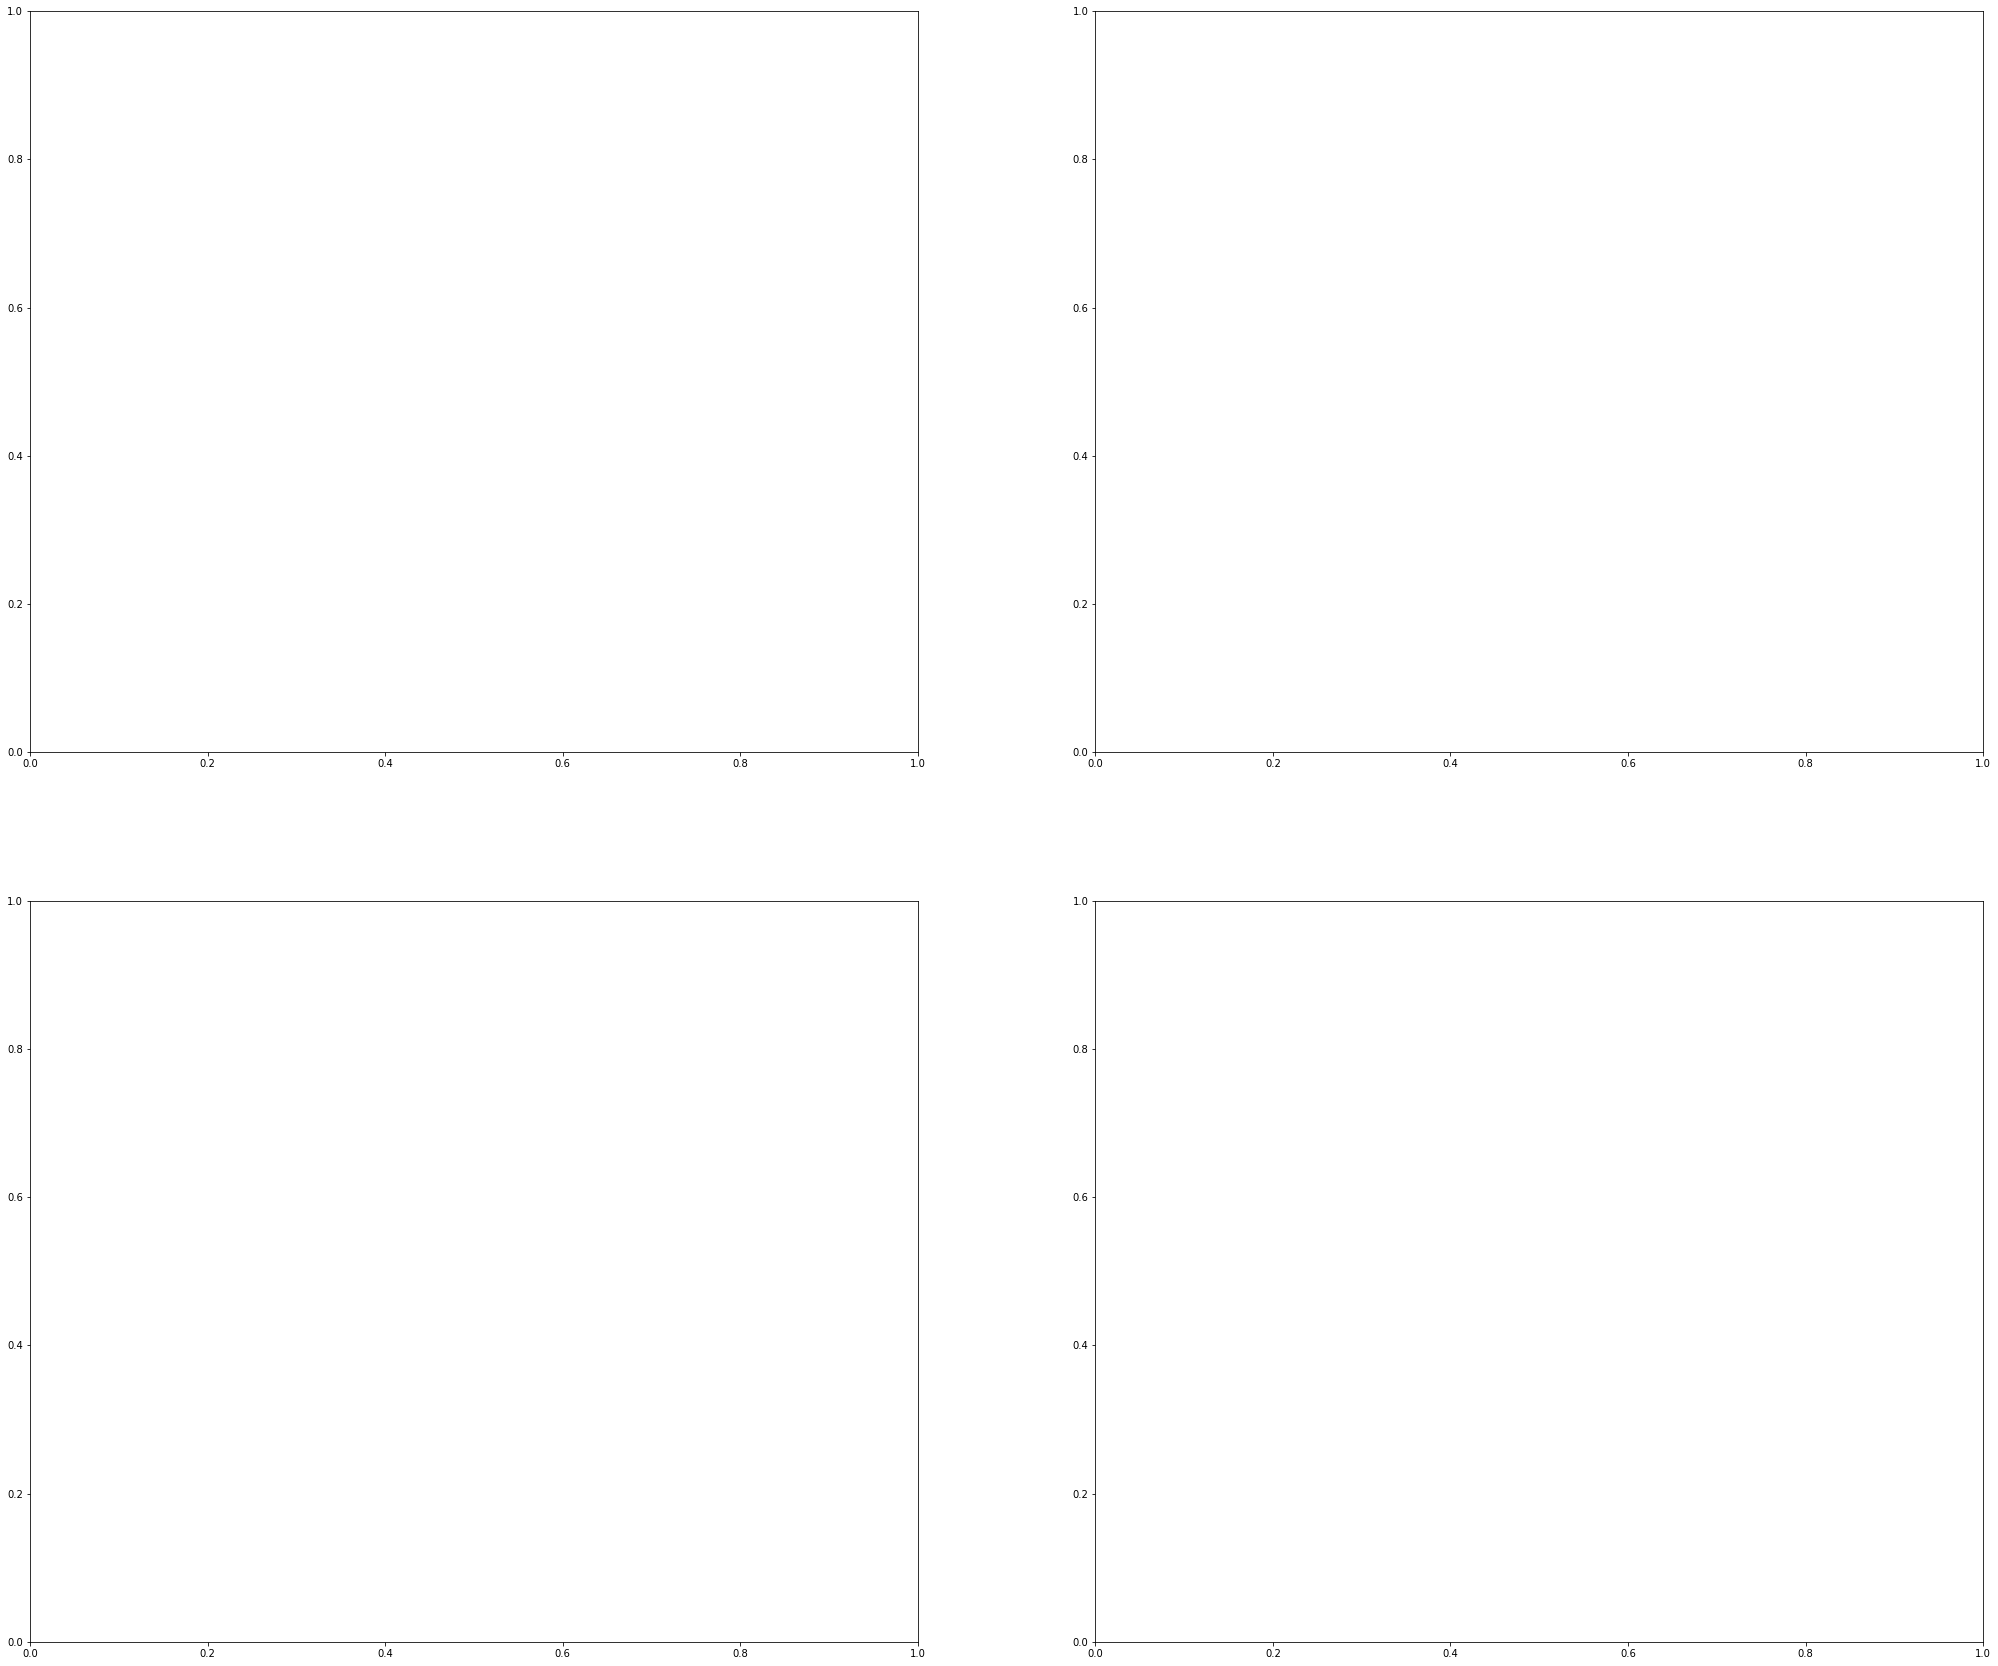

In [22]:
f_all, axs = plt.subplots(2,2,figsize=(35,30),gridspec_kw={'wspace':.2,'hspace':.2})

In [23]:
#Exclude Ib-pec and Ic-pec SNe
exclude = ['sn2007uy', 'sn2009er', 'sn2005ek']

In [24]:
svmsc=[]
f_all,svmsc,av0,std0,av0_train,std0_train=snidPCA0.pcaPlot(1,5,(10,7),alphamean=.5,alphaell=.1,alphasvm=10,purity=True,
                                     excludeSNe=exclude, std_rad=1.0, svm=True, count=3, fig=f_all,
                                     ax=f_all.axes[0],ncv=50, markOutliers=True)
print(av0, std0)

0.5364705882352943 0.09603920767980495


In [25]:
svmsc=[]
f_all,svmsc, av5, std5, av5_train,std5_train=snidPCA5.pcaPlot(1,3,(10,7),alphamean=.5,alphaell=.1,alphasvm=10,purity=True, 
                                       excludeSNe=exclude,std_rad=1.0, svm=True, count=3, 
                                       fig=f_all, ax=f_all.axes[1], ncv=50, markOutliers=True)
print(av5, std5)

0.56625 0.09471173369757309


In [26]:
svmsc=[]
f_all,svmsc, av10, std10 ,av10_train,std10_train=snidPCA10.pcaPlot(1,3,(10,7),alphamean=.5,alphaell=.1,alphasvm=10,
                                          purity=True,excludeSNe=exclude, std_rad=1.0, svm=True,
                                          count=3, fig=f_all, ax=f_all.axes[2],ncv=50, markOutliers=True)
print(av10, std10)

0.5411764705882354 0.07533087338156294


In [29]:
svmsc=[]
f_all,svmsc, av15, std15,av15_train,std15_train=snidPCA15.pcaPlot(1,3,(10,7),alphamean=.5,alphaell=.1,alphasvm=10,
                                          purity=True, excludeSNe=exclude,std_rad=1.0,
                                          svm=True, count=3, fig=f_all, ax=f_all.axes[3],ncv=50, markOutliers=True)
print(av15, std15)

0.4152941176470587 0.11061951998039063


In [30]:
for i,ax in enumerate(f_all.axes):
    l = ax.get_legend()
    t = l.get_title()
    t.set_fontsize(30)
    ax.tick_params(axis='both',which='major', length=20,direction='inout',labelsize=35)
    ax.tick_params(axis='both',which='minor', length=10,direction='inout')
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    if i==0:
        l = ax.get_legend()
        t = l.get_title()
        l.set_title('')
        ymax = ymax + 0.5
        ax.set_ylim((ymin,ymax+0.5))
        ax.text(xmin + .1,ymax - .3,'$t_{V_{max}} = 0 \pm 5$ days\nSVM Test Score = %.2f$\pm$%.2f'%(av0,std0),fontsize=45)
        ax.set_ylabel('PC5', fontsize=50)
        ax.set_xlabel('PC1', fontsize=50)
    elif i==1:
        ymax = ymax + 0.5
        ax.set_ylim((ymin,ymax+0.5))
        ax.text(xmin + .1,ymax - .2,'$t_{V_{max}} = 5 \pm 5$ days\nSVM Test Score = %.2f$\pm$%.2f'%(av5,std5),fontsize=45)
        ax.set_ylabel('PC3', fontsize=50)
        ax.set_xlabel('PC1', fontsize=50)
        ax.get_legend().remove()
    elif i==2:
        ymax = ymax + 0.5
        ax.set_ylim((ymin,ymax+0.5))
        ax.text(xmin + .1,ymax - .4,'$t_{V_{max}} = 10 \pm 5$ days\nSVM Test Score = %.2f$\pm$%.2f'%(av10,std10),fontsize=45)
        ax.set_ylabel('PC3', fontsize=50)
        ax.set_xlabel('PC1', fontsize=50)
        ax.get_legend().remove()
    else:
        ymax = ymax + 0.5
        ax.set_ylim((ymin,ymax+0.5))
        ax.text(xmin + .1,ymax - .4,'$t_{V_{max}} = 15 \pm 5$ days\nSVM Test Score = %.2f$\pm$%.2f'%(av15,std15),fontsize=45)
        ax.set_ylabel('PC3', fontsize=50)
        ax.set_xlabel('PC1', fontsize=50)
        ax.get_legend().remove()

In [31]:
#IIb 2std outliers:  ['sn2016gkg' 'sn2011dh']
#Ib 2std outliers:  ['sn2004gq' 'sn2007uy' 'sn1998dt' 'sn2009er' 'sn2007kj']
#Ic 2std outliers:  ['sn2005az']
#IcBL 2std outliers:  ['sn2010bh']
ax = f_all.axes[0]

ax.text(-.22,1.25,'07uy',fontdict={'color':'k','fontsize':35})
ax.text(.352,.302,'09er',fontdict={'color':'k','fontsize':35})
ax.text(.6,-.82,'04gq',fontdict={'color':'k','fontsize':35})
ax.text(1.45,-0.85,'98dt',fontdict={'color':'k','fontsize':35})
ax.text(3.3,.69,'07kj',fontdict={'color':'k','fontsize':35})

ax.text(1.413,-2.14,'16gkg',fontdict={'color':'k','fontsize':35})
ax.text(4.15,1.08,'11dh',fontdict={'color':'k','fontsize':35})

ax.text(0.25,-0.25,'10bh',fontdict={'color':'k','fontsize':35})

ax.text(2.9,1.48,'05az',fontdict={'color':'k','fontsize':35})



#IIb 2std outliers:  ['sn2011ei' '10as']
#Ib 2std outliers:  ['sn1998dt' 'sn2009er' 'sn2007Y']
#Ic 2std outliers:  ['sn1990B']
#IcBL 2std outliers:  ['sn2002ap' '16coi']
ax = f_all.axes[1]

ax.text(2.11,-2.5,'11ei',fontdict={'color':'k','fontsize':35})
ax.text(5.1,1.8,'10as',fontdict={'color':'k','fontsize':35})

ax.text(0.08,-.31,'09er',fontdict={'color':'k','fontsize':35})
ax.text(4.56,.76,'07Y',fontdict={'color':'k','fontsize':35})
ax.text(1.58,-1.72,'98dt',fontdict={'color':'k','fontsize':35})

ax.text(2.7,-0.8,'90B',fontdict={'color':'k','fontsize':35})

ax.text(.75,.0,'02ap',fontdict={'color':'k','fontsize':35})
ax.text(.08,-.6,'16coi',fontdict={'color':'k','fontsize':35})

ax.text(-0.16,-1.12,'16gkg',fontdict={'color':'k','fontsize':35})

ax.text(-0.28,.55,'07bg',fontdict={'color':'k','fontsize':35})

ax.text(3.79,.66,'07kj',fontdict={'color':'k','fontsize':35})







#IIb 2std outliers:  ['sn2011ei']
#Ib 2std outliers:  ['sn2007uy' 'sn1990U' 'sn1990I']
#Ic 2std outliers:  ['sn1994I']
#IcBL 2std outliers:  ['sn2002ap' 'sn2007bg']
ax = f_all.axes[2]

ax.text(1.15,-.97,'07uy',fontdict={'color':'k','fontsize':35})
ax.text(1.39,-1.40,'90I',fontdict={'color':'k','fontsize':35})
ax.text(4.69,.28, '90U',fontdict={'color':'k','fontsize':35})


ax.text(2.56,-2.0,'11ei',fontdict={'color':'k','fontsize':35})

ax.text(2.99,-1.40,'94I',fontdict={'color':'k','fontsize':35})

ax.text(1.03,-.33,'02ap',fontdict={'color':'k','fontsize':35})
ax.text(-1.02,-.95,'07ru',fontdict={'color':'k','fontsize':35})

ax.text(1.72,-2.40,'99ex',fontdict={'color':'k','fontsize':35})





#IIb 2std outliers:  ['sn2011ei']
#Ib 2std outliers:  ['sn2007uy' 'sn1990I' 'sn2009er' 'sn2004gq' 'sn2007Y']
#Ic 2std outliers:  ['sn1994I']
#IcBL 2std outliers:  ['sn2010ay' '16coi']
ax = f_all.axes[3]

ax.text(.66,-1.18,'09er',fontdict={'color':'k','fontsize':35})
ax.text(.95,-1.79,'07uy',fontdict={'color':'k','fontsize':35})
ax.text(.85,-2.38,'90I',fontdict={'color':'k','fontsize':35})
ax.text(5.06,0.58,'07Y',fontdict={'color':'k','fontsize':35})
ax.text(2.08,-3.43,'04gq',fontdict={'color':'k','fontsize':35})

ax.text(3.72,-2.09,'11ei',fontdict={'color':'k','fontsize':35})

ax.text(2.34,-1.85,'94I',fontdict={'color':'k','fontsize':35})

ax.text(-.9,.88,'10ay',fontdict={'color':'k','fontsize':35})
ax.text(-0.4,-1.3,'16coi',fontdict={'color':'k','fontsize':35})

#ax.text(2.0, 1.0, 'Test', color='green',fontdict={'color':'k','fontsize':35}, bbox=dict(facecolor='white', edgecolor='none', boxstyle='round',alpha=.5))

Text(-0.4, -1.3, '16coi')

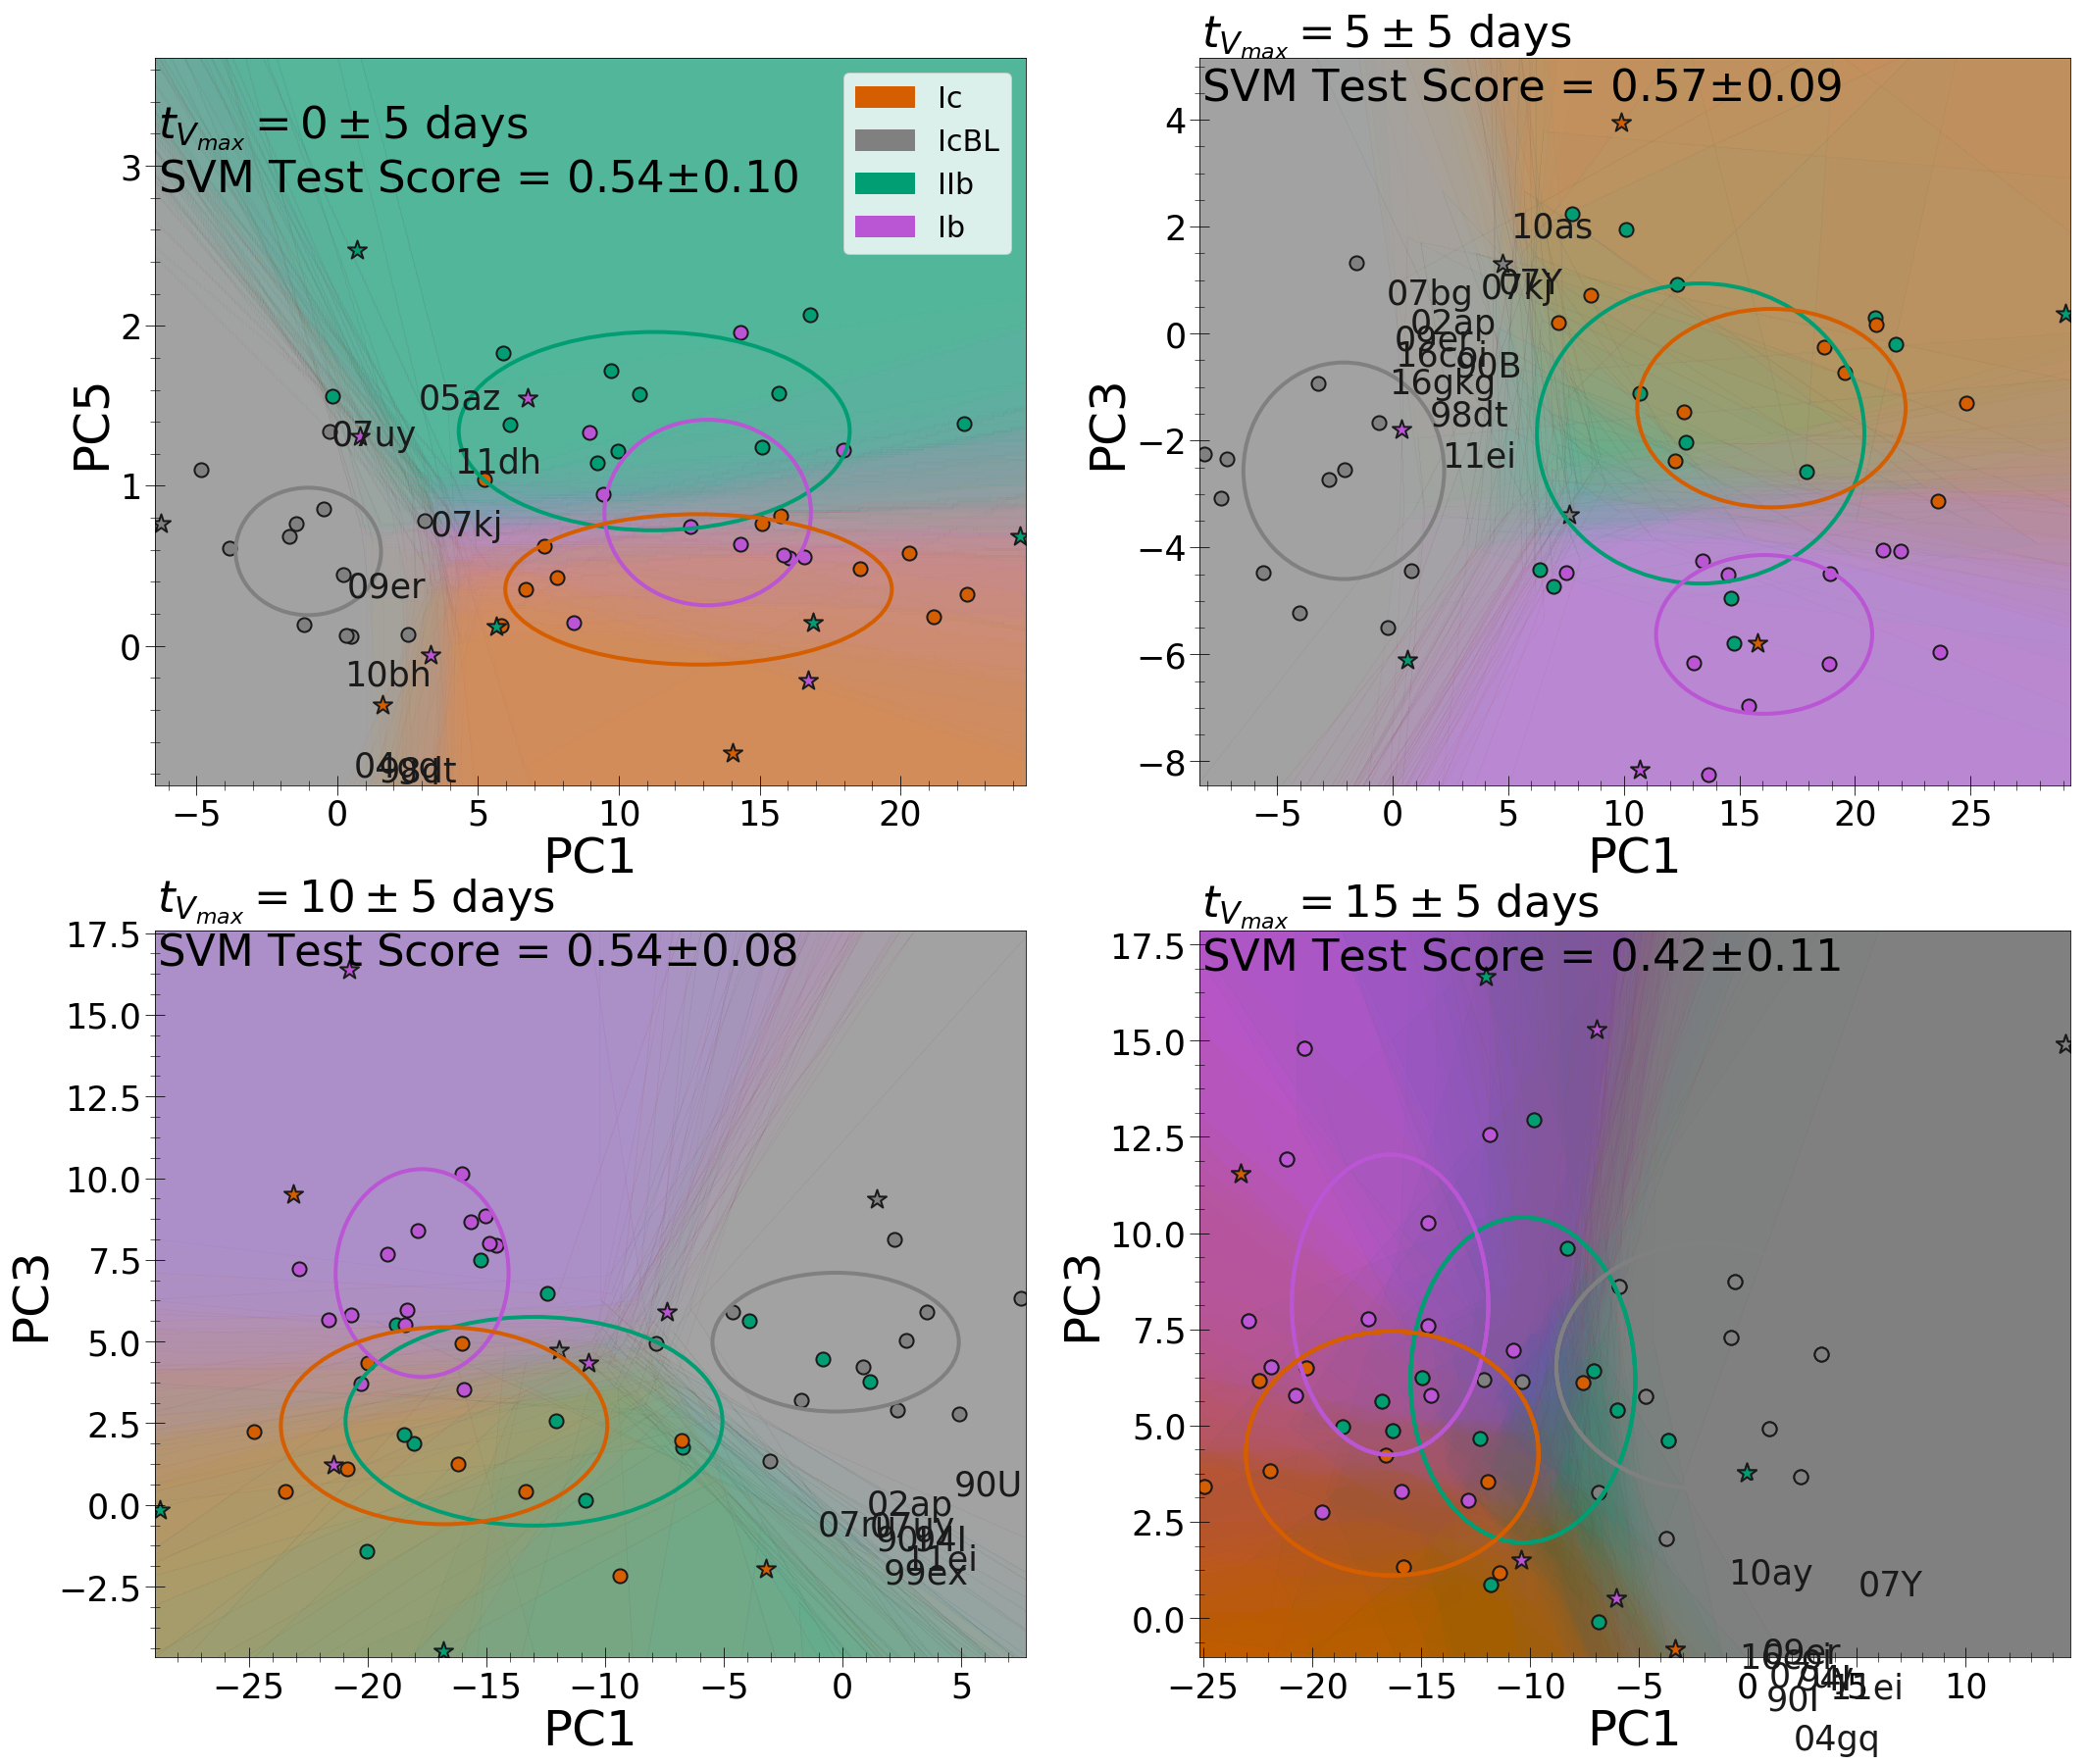

In [32]:
f_all